# prompt: Wrtie a code to load data from big query, using service_account jsono key

import pandas as pd
from google.cloud import bigquery

# Set the project ID and service account JSON key file path.
project_id = 'gothc-sylph-387906'
key_path = '/content/gothic-sylph-387906-be5d72dfb9b1.json'

# Authenticate with BigQuery using the service account key file.
bigquery_client = bigquery.Client.from_service_account_json(key_path)

# Set the query string.
query_string = f'''SELECT fact.user_id,fact.module_id,fact.score,time.time_homework,time.time_lectures
                    FROM `gold.fact_scores_dbt_model` as fact
                    JOIN
                    (select user_id,time_homework,time_lectures from `gold.fact_time_dbt_model`) as time
                    on fact.user_id =time.user_id '''

# Read the data from BigQuery into a pandas DataFrame.
df = bigquery_client.query(query_string).to_dataframe()

# Print the DataFrame.
df


In [15]:
df.shape


(69336, 5)

In [19]:
# prompt: drop duplicate rows and then drop the user_id column adn create a new df for this
# Create a new DataFrame
new_df = df.copy()

# Print the new DataFrame
new_df
# Drop duplicate rows
new_df.drop_duplicates(inplace=True)

# Drop the 'user_id' column
new_df.drop(columns=['user_id'], inplace=True)


new_df

module_id  score  time_homework  time_lectures
0            m1    0.0            3.0           11.0
1            m1    0.0            1.0            8.0
2            m1    0.0            0.0            0.0
9            m1    0.0            1.5           12.0
10           m1    0.0            0.0            0.0
...         ...    ...            ...            ...
69328     p_sub   55.0           12.0            6.0
69329     p_sub   55.0           16.0           16.0
69330     p_sub   55.0           12.0           12.0
69331     p_sub   55.0            8.0           12.0
69332     p_sub   55.0            0.0            0.0

[23200 rows x 4 columns]

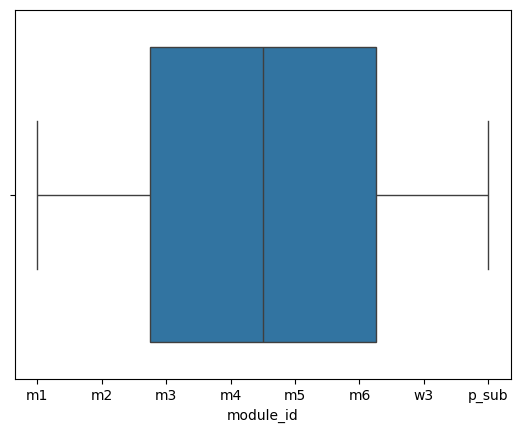

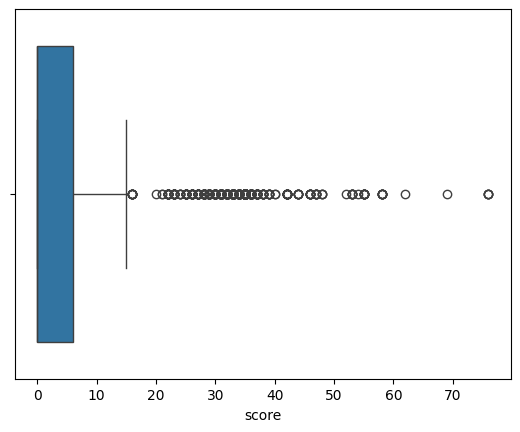

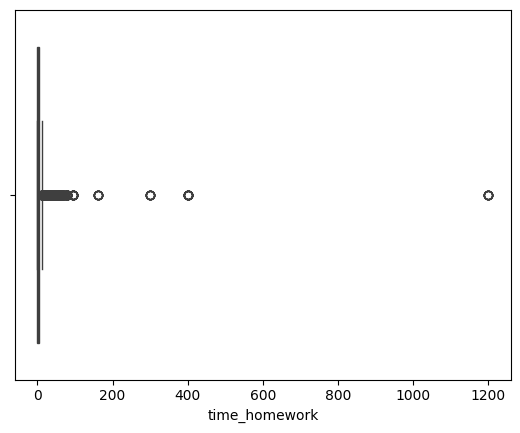

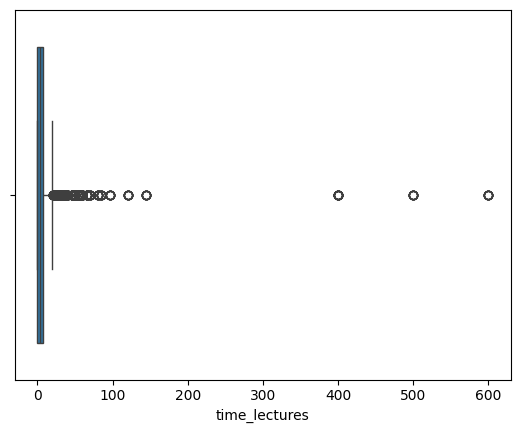

In [20]:
# prompt: Give me code to plot outliers

import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot for each column in the DataFrame.
for col in new_df.columns:
  sns.boxplot(x=new_df[col])
  plt.show()


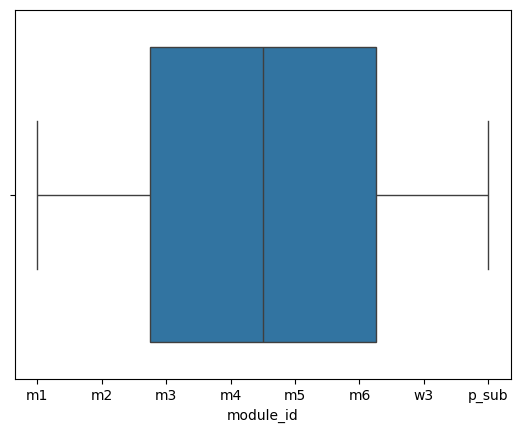

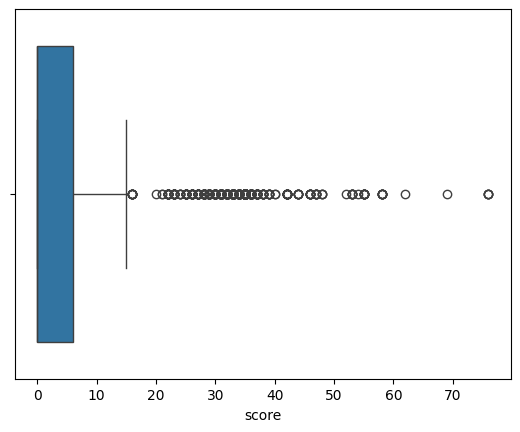

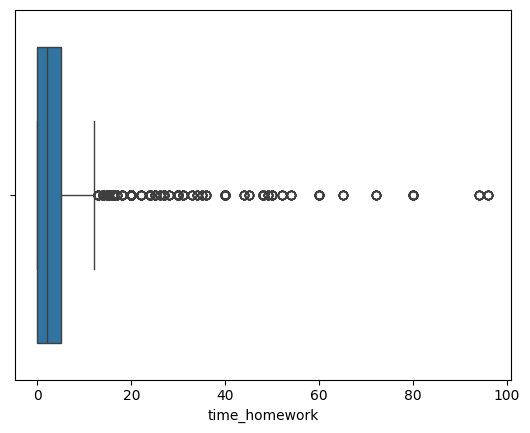

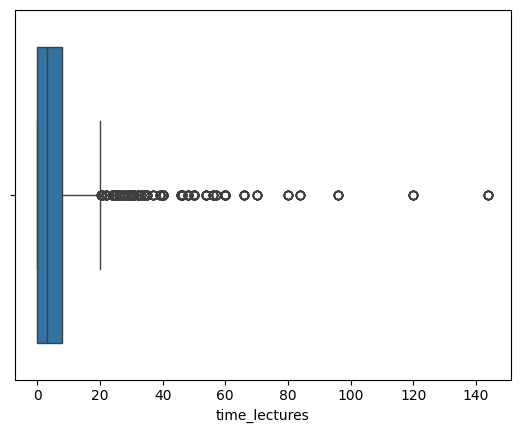

In [21]:
# prompt: in time_homework and time_lectures columns if value is above 100 and 150 respectively handle those outliers
import numpy as np
# Replace outliers in time_homework column with the 99th percentile value.
new_df['time_homework'] = np.where(new_df['time_homework'] > 100, np.percentile(new_df['time_homework'], 99), new_df['time_homework'])

# Replace outliers in time_lectures column with the 99th percentile value.
new_df['time_lectures'] = np.where(new_df['time_lectures'] > 150, np.percentile(new_df['time_lectures'], 99), new_df['time_lectures'])

# Create a boxplot for each column in the DataFrame.
for col in new_df.columns:
  sns.boxplot(x=new_df[col])
  plt.show()


            score                                                  \
            count      mean        std  min  25%  50%   75%   max   
module_id                                                           
m1         2900.0  5.945172   3.032211  0.0  5.0  7.0   8.0  16.0   
m2         2900.0  3.105862   3.516016  0.0  0.0  0.0   6.0  14.0   
m3         2900.0  3.203793   3.831054  0.0  0.0  0.0   7.0  15.0   
m4         2900.0  1.754828   2.851788  0.0  0.0  0.0   5.0  13.0   
m5         2900.0  2.172414   3.386345  0.0  0.0  0.0   6.0  14.0   
m6         2900.0  0.529655   1.595575  0.0  0.0  0.0   0.0  12.0   
p_sub      2900.0  9.509655  15.516860  0.0  0.0  0.0  27.0  76.0   
w3         2900.0  0.201034   0.968599  0.0  0.0  0.0   0.0   7.0   

          time_homework            ...            time_lectures            \
                  count      mean  ...  75%   max         count      mean   
module_id                          ...                                      
m1       

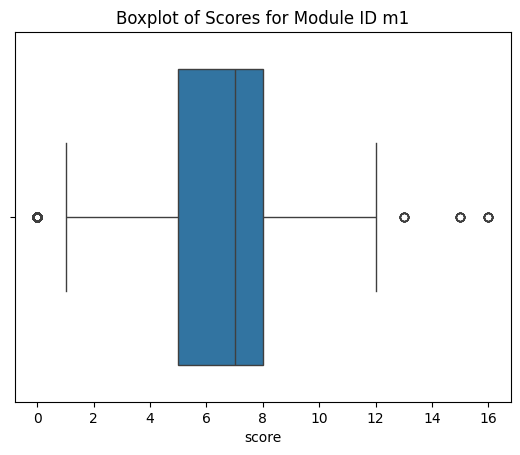

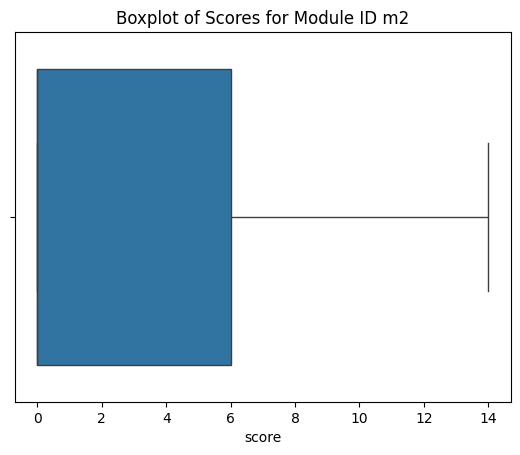

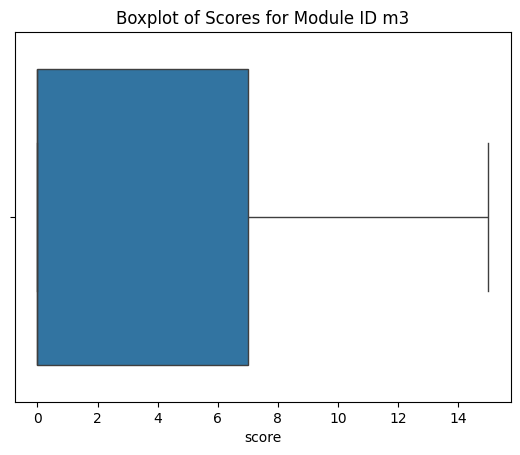

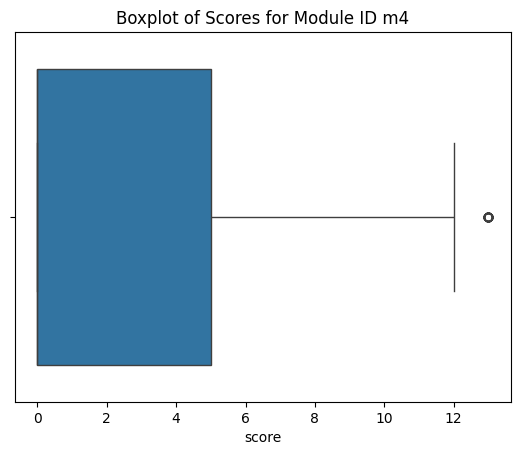

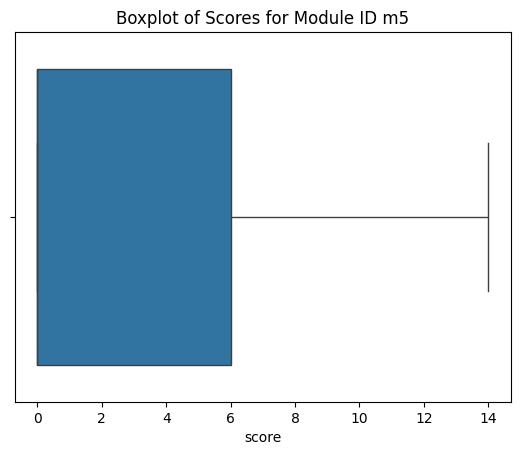

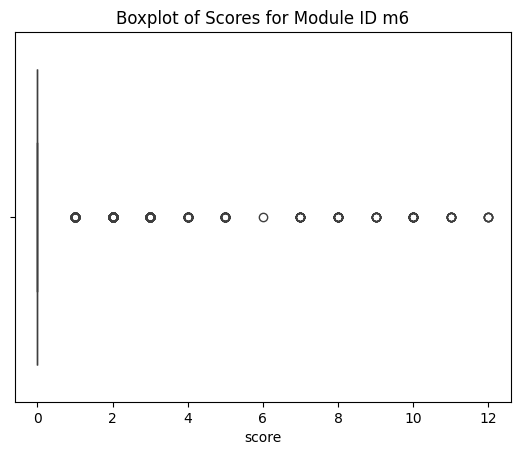

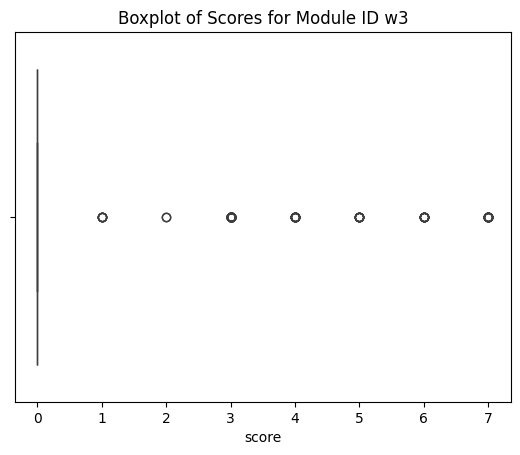

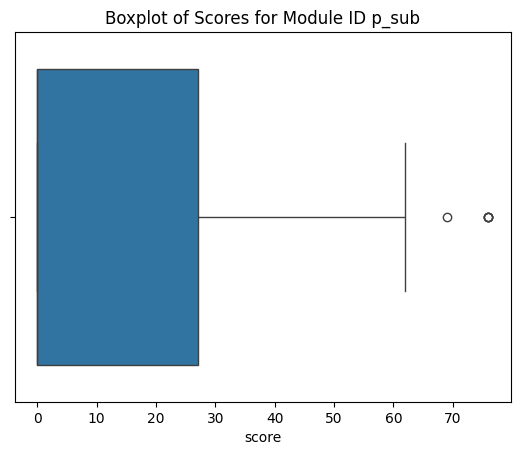

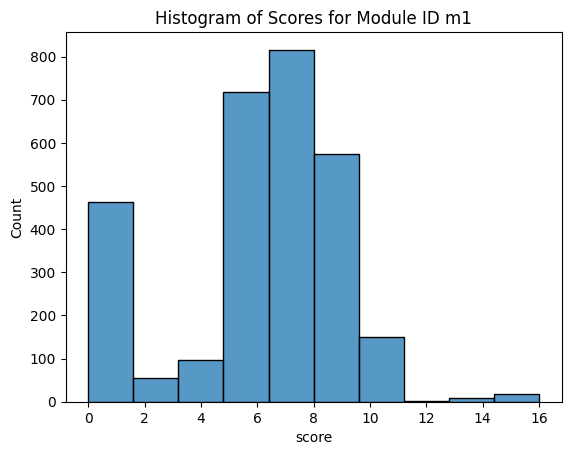

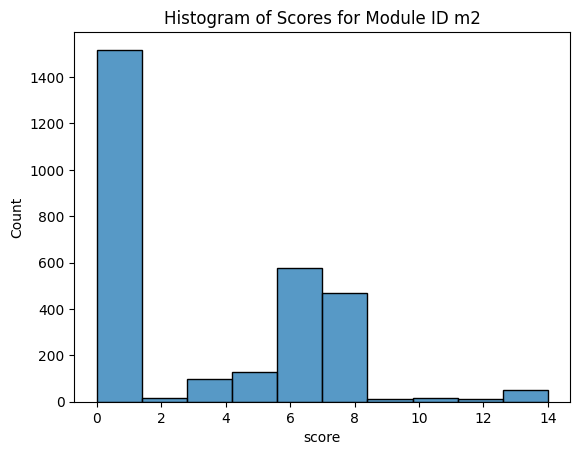

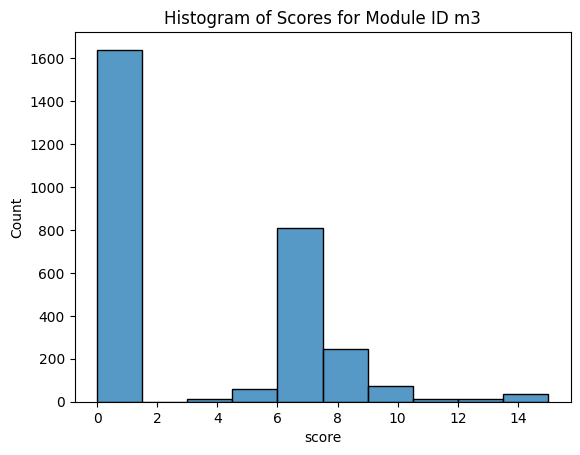

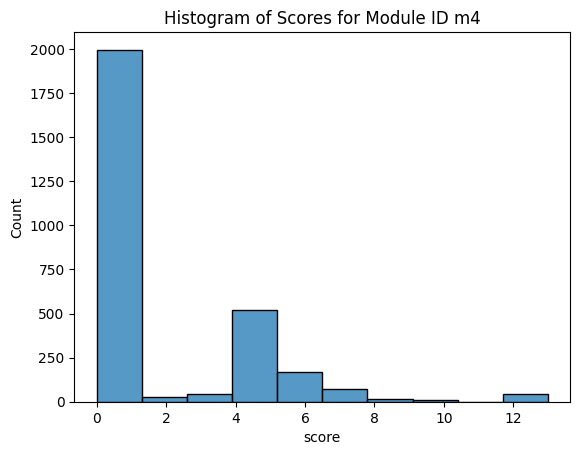

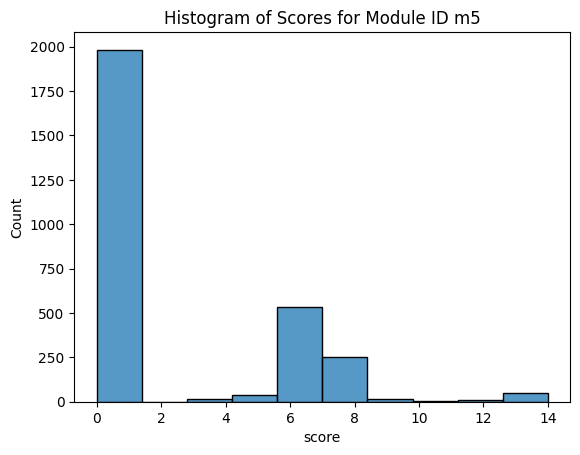

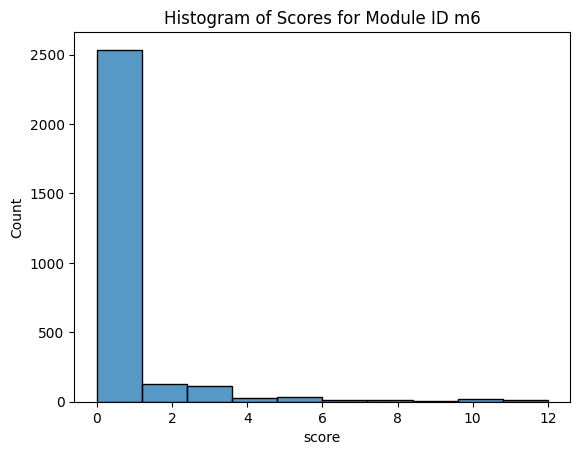

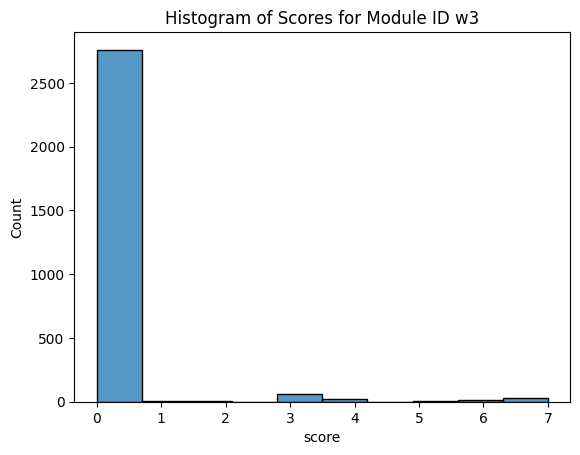

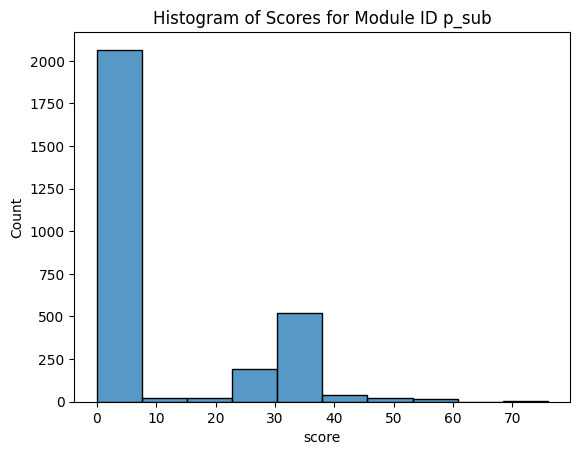

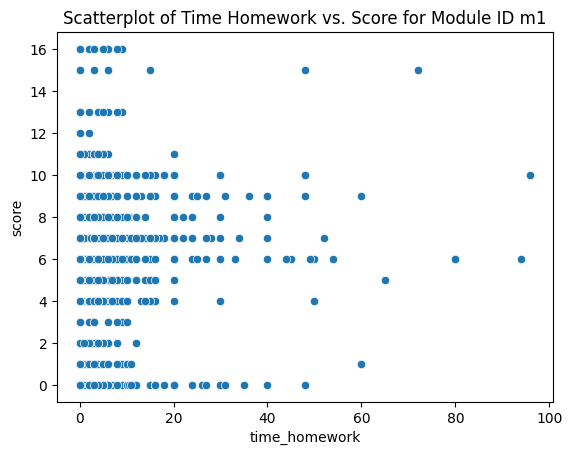

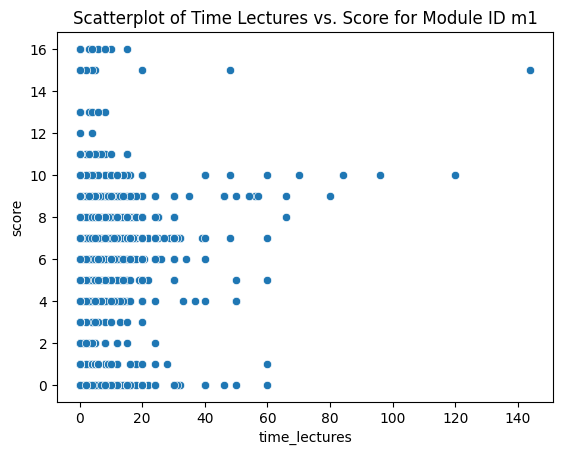

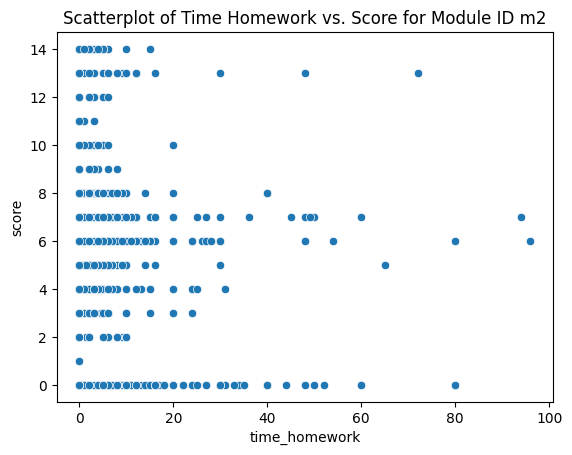

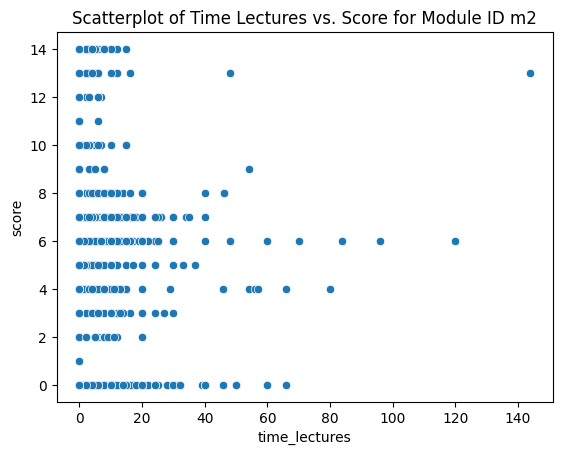

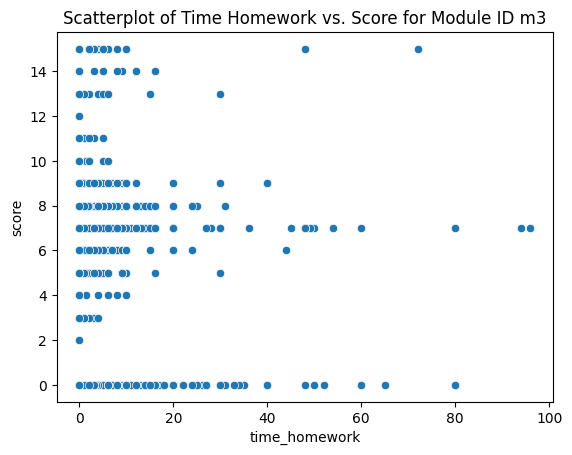

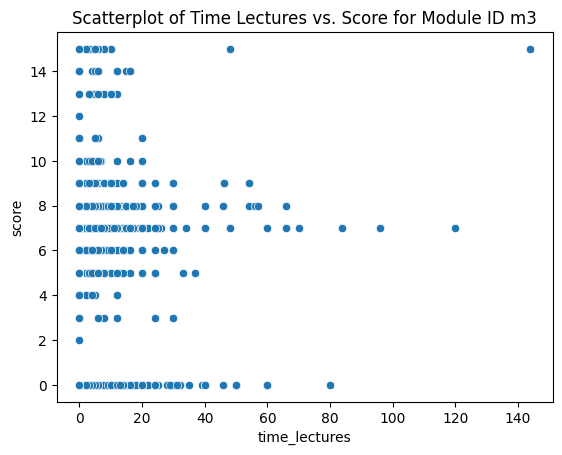

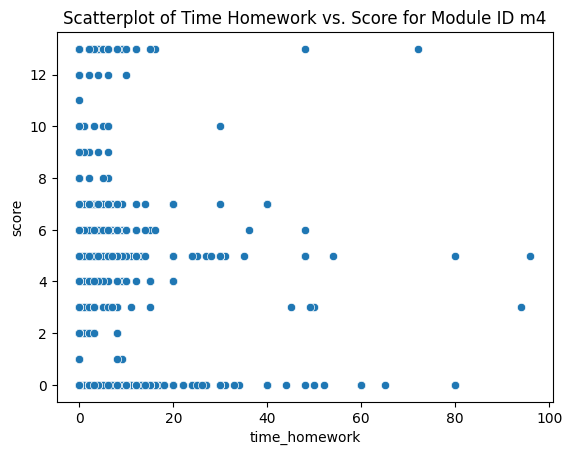

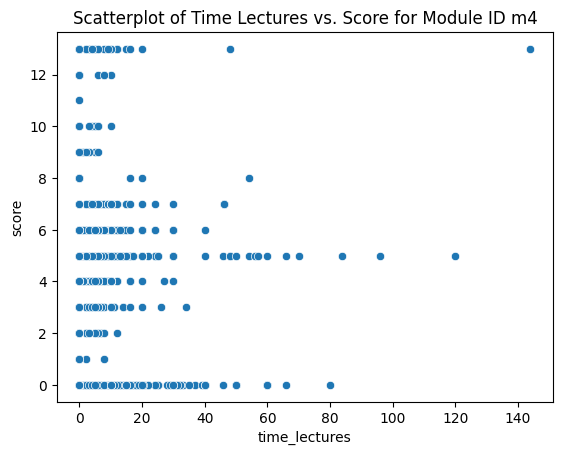

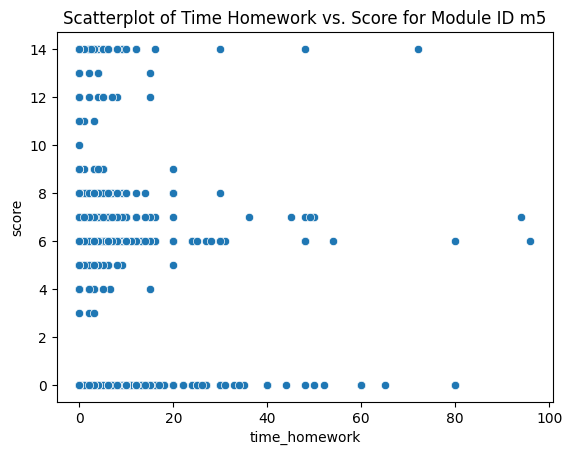

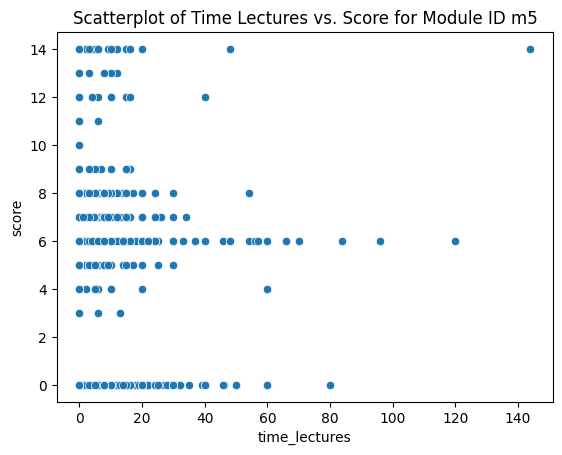

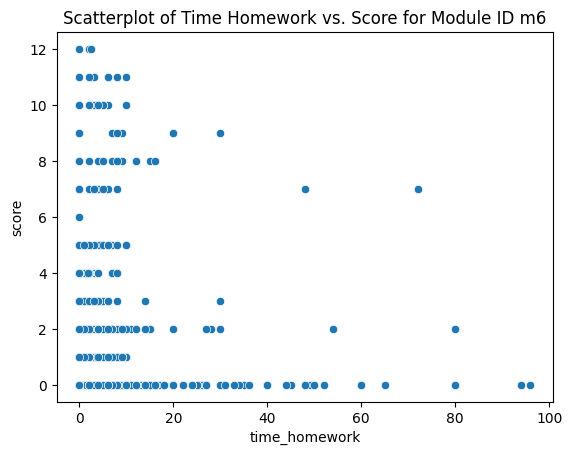

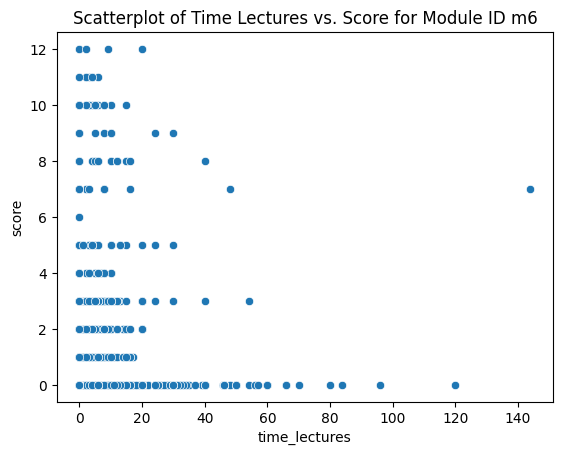

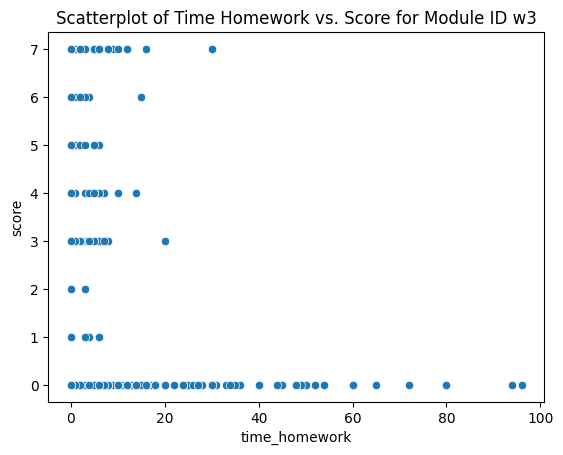

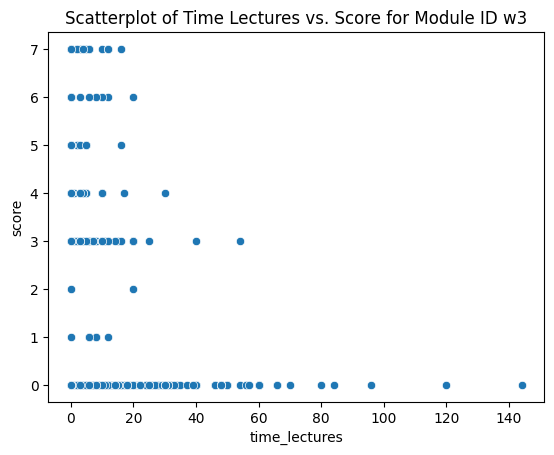

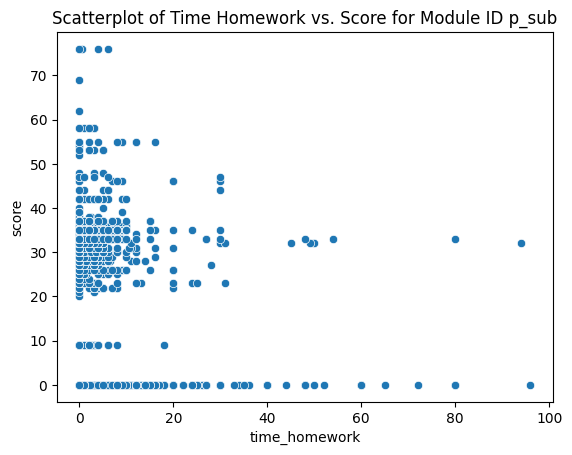

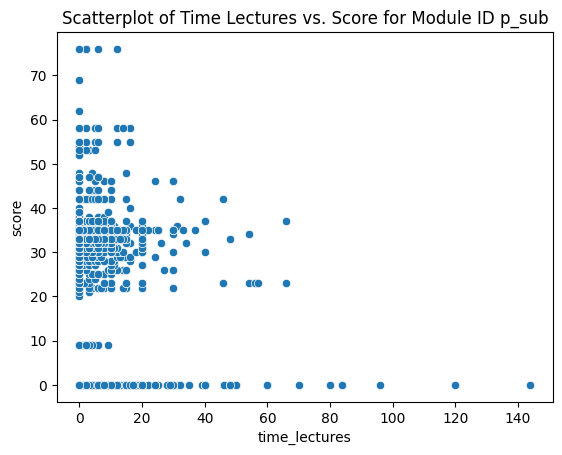

In [22]:
# prompt: Generate plots from where I can do eda works for each module id,

# Group the data by module_id and calculate descriptive statistics for each column.
grouped_df = new_df.groupby('module_id').describe()

# Print the grouped data.
print(grouped_df)

# Create a boxplot for each module_id in the DataFrame.
for module_id in new_df['module_id'].unique():
  module_df = new_df[new_df['module_id'] == module_id]
  sns.boxplot(x=module_df['score'])
  plt.title(f'Boxplot of Scores for Module ID {module_id}')
  plt.show()

# Create a histogram for each module_id in the DataFrame.
for module_id in new_df['module_id'].unique():
  module_df = new_df[new_df['module_id'] == module_id]
  sns.histplot(x=module_df['score'], bins=10)
  plt.title(f'Histogram of Scores for Module ID {module_id}')
  plt.show()

# Create a scatterplot for each module_id in the DataFrame.
for module_id in new_df['module_id'].unique():
  module_df = new_df[new_df['module_id'] == module_id]
  sns.scatterplot(x='time_homework', y='score', data=module_df)
  plt.title(f'Scatterplot of Time Homework vs. Score for Module ID {module_id}')
  plt.show()

  sns.scatterplot(x='time_lectures', y='score', data=module_df)
  plt.title(f'Scatterplot of Time Lectures vs. Score for Module ID {module_id}')
  plt.show()


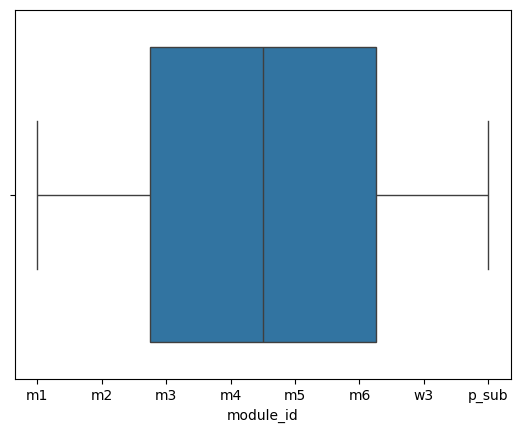

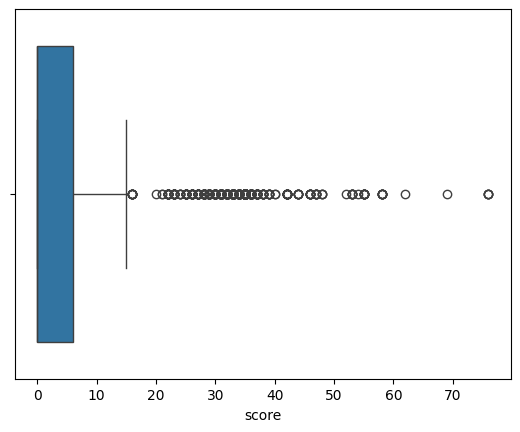

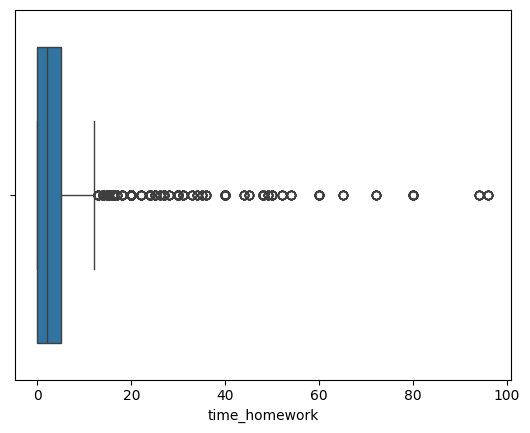

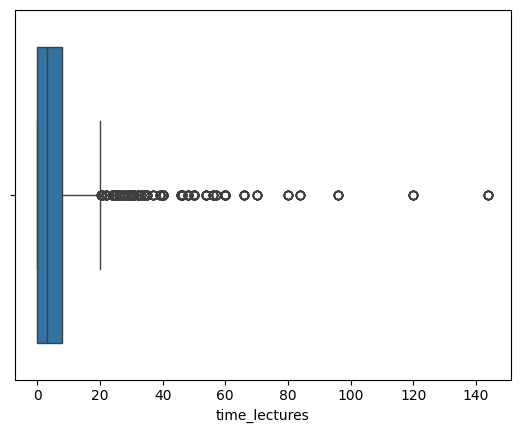

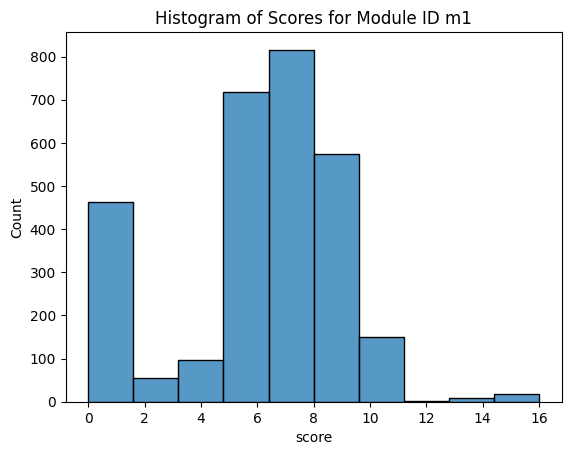

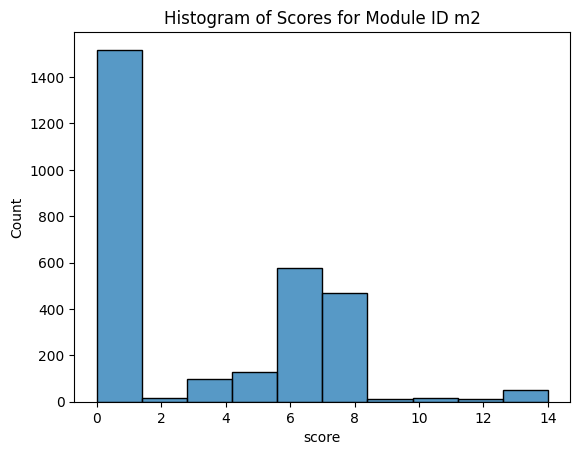

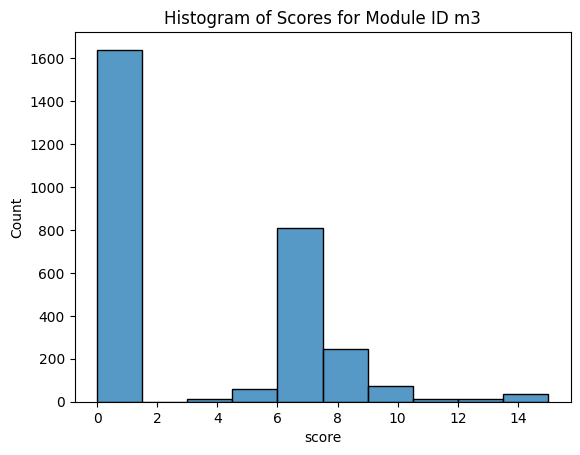

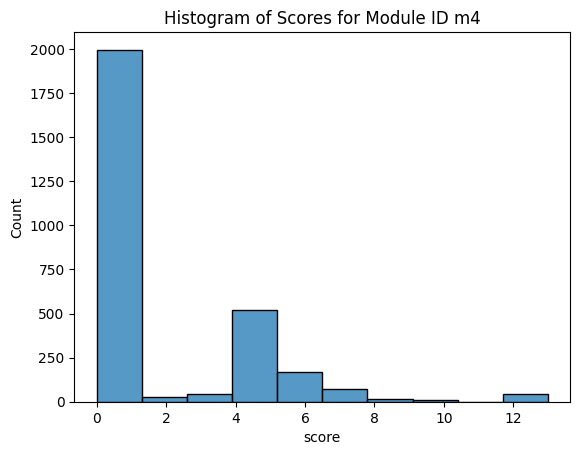

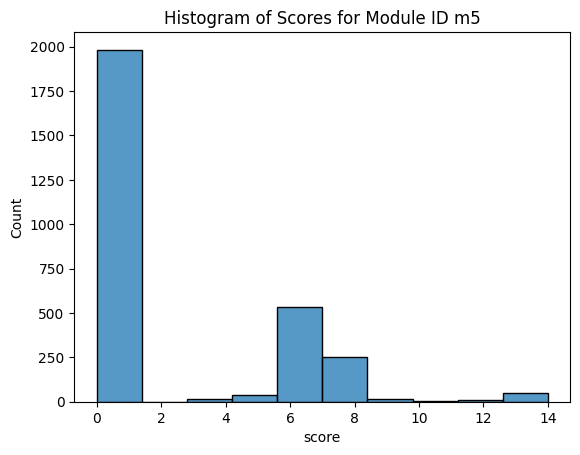

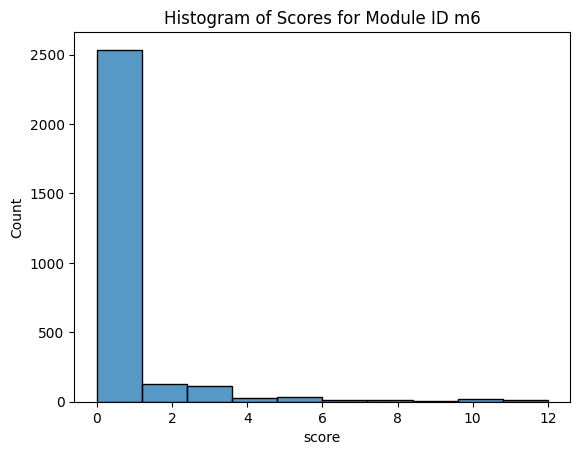

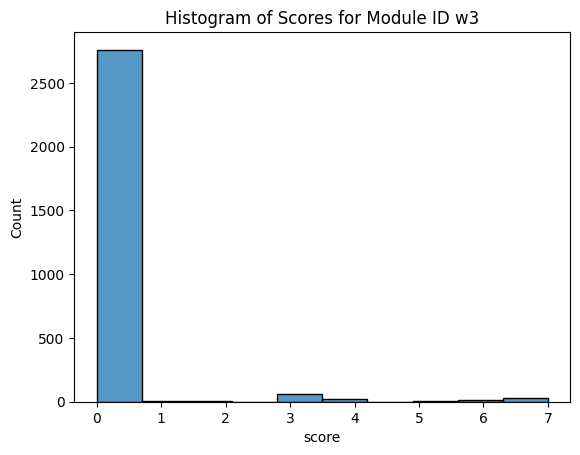

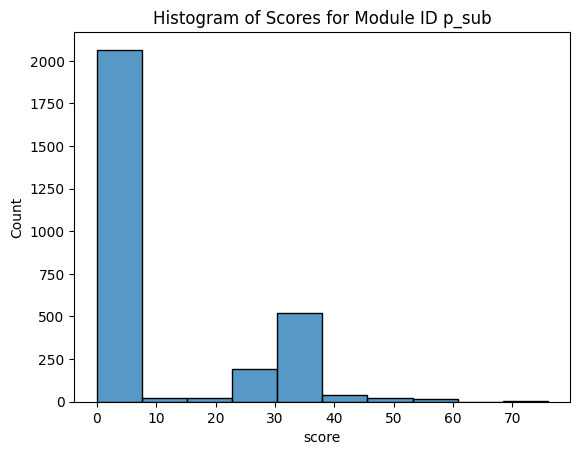

In [23]:
# prompt: There are a lot of 0 scores, do something to handle those and then generate the  box and histogram plots generated in previosu block.Dont completey remove the 0 scores but do something so i can see the plot more cleary

# Replace 0 scores with the minimum non-zero score in each module.
for module_id in new_df['module_id'].unique():
  module_df = new_df[new_df['module_id'] == module_id]
  min_score = module_df['score'].min()
  new_df.loc[(new_df['module_id'] == module_id) & (new_df['score'] == 0), 'score'] = min_score

# Create a boxplot for each column in the DataFrame.
for col in new_df.columns:
  sns.boxplot(x=new_df[col])
  plt.show()

# Create a histogram for each module_id in the DataFrame.
for module_id in new_df['module_id'].unique():
  module_df = new_df[new_df['module_id'] == module_id]
  sns.histplot(x=module_df['score'], bins=10)
  plt.title(f'Histogram of Scores for Module ID {module_id}')
  plt.show()


R-squared score for Random Forest with features score, time_homework and label: time_lectures: 0.21
R-squared score for Gradient Boosting with features score, time_homework and label: time_lectures: 0.25
R-squared score for Support Vector Regression with features score, time_homework and label: time_lectures: 0.22
R-squared score for Ridge Regression with features score, time_homework and label: time_lectures: 0.10


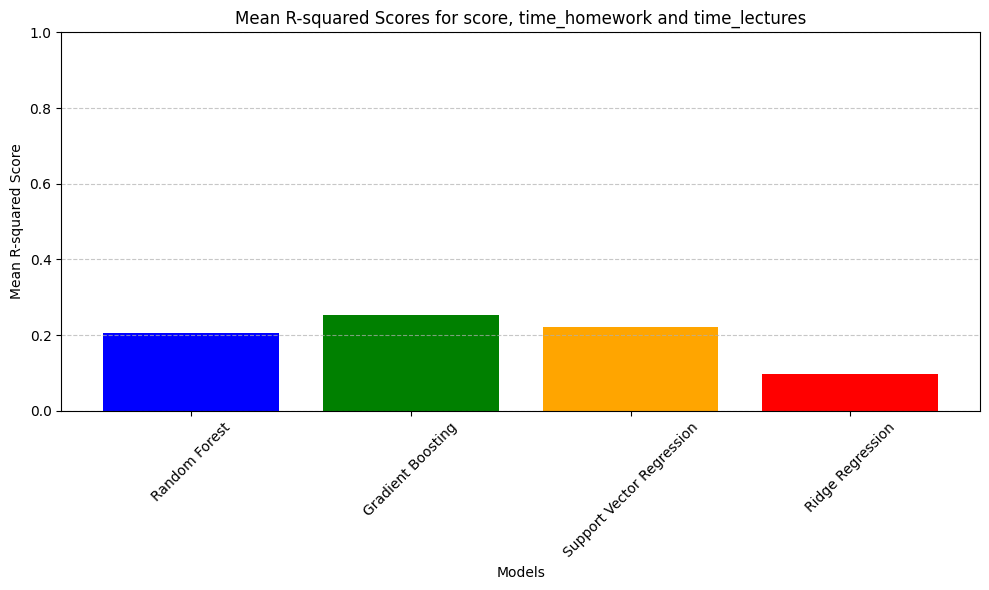

R-squared score for Random Forest with features score, time_lectures and label: time_homework: 0.03
R-squared score for Gradient Boosting with features score, time_lectures and label: time_homework: 0.10
R-squared score for Support Vector Regression with features score, time_lectures and label: time_homework: 0.12
R-squared score for Ridge Regression with features score, time_lectures and label: time_homework: 0.19


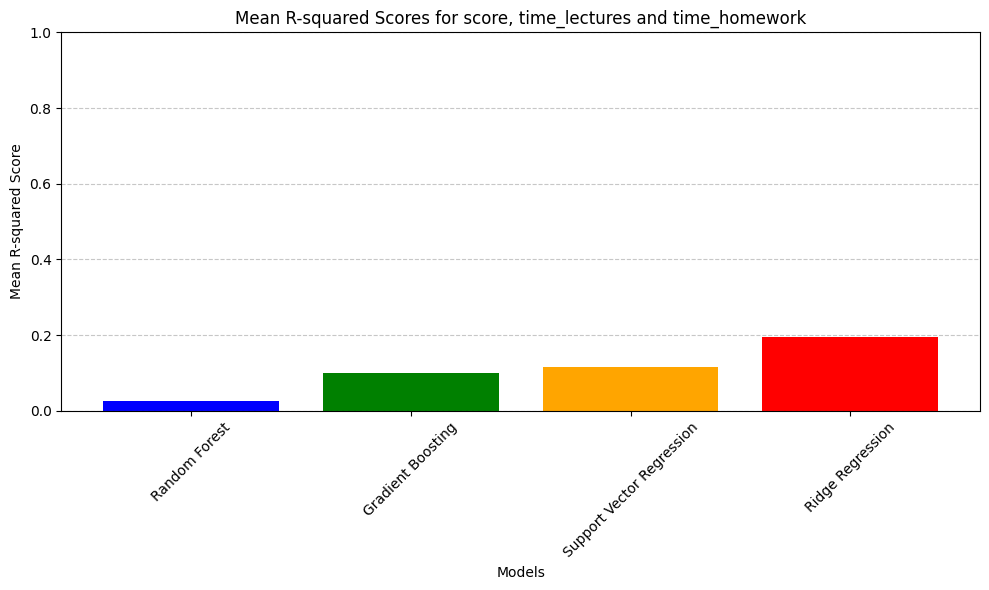

R-squared score for Random Forest with features time_homework, score and label: time_lectures: 0.21
R-squared score for Gradient Boosting with features time_homework, score and label: time_lectures: 0.25
R-squared score for Support Vector Regression with features time_homework, score and label: time_lectures: 0.22
R-squared score for Ridge Regression with features time_homework, score and label: time_lectures: 0.10


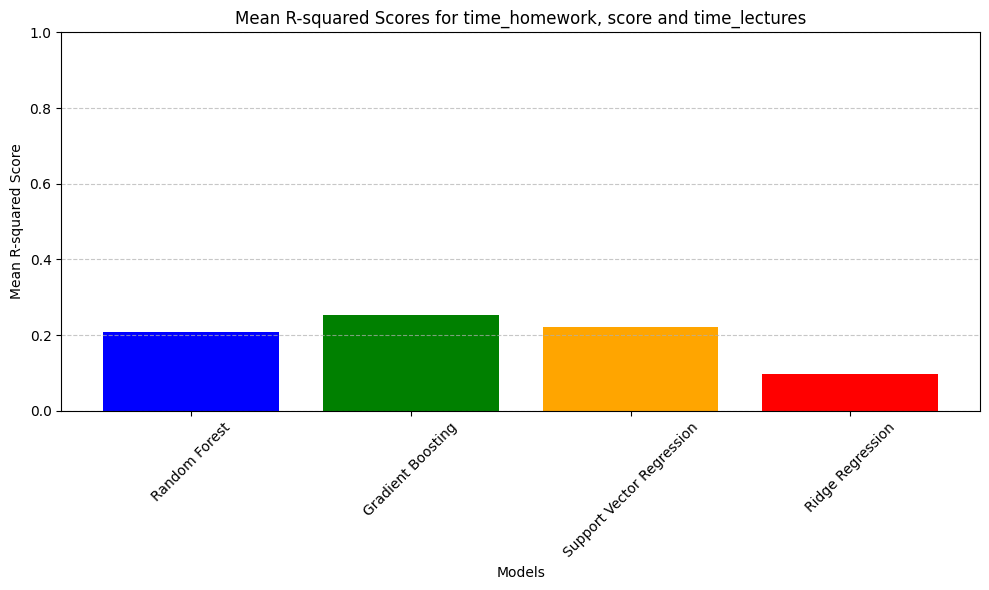

R-squared score for Random Forest with features time_homework, time_lectures and label: score: -10.25
R-squared score for Gradient Boosting with features time_homework, time_lectures and label: score: -7.88
R-squared score for Support Vector Regression with features time_homework, time_lectures and label: score: -6.35
R-squared score for Ridge Regression with features time_homework, time_lectures and label: score: -7.14


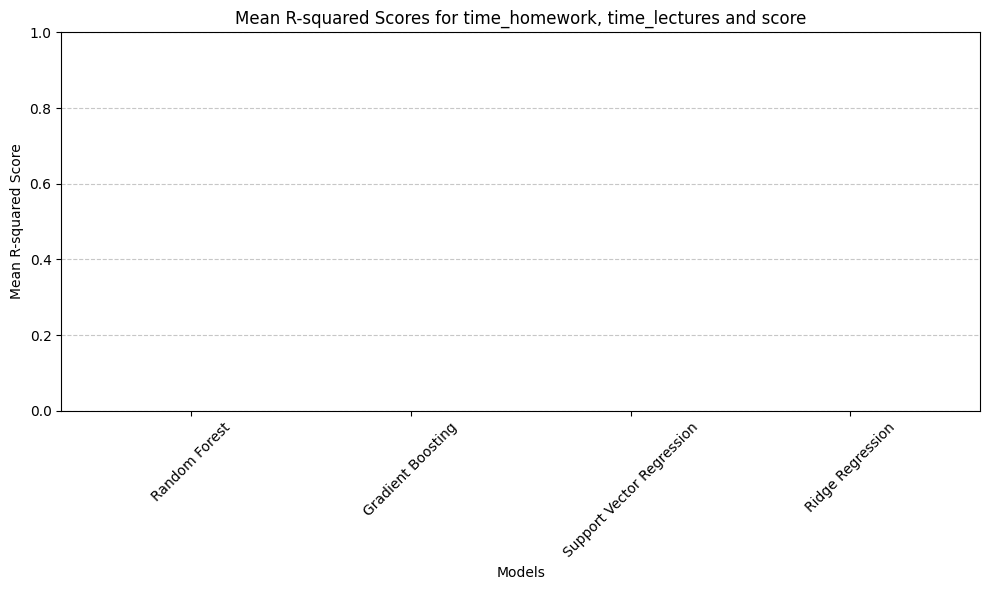

R-squared score for Random Forest with features time_lectures, score and label: time_homework: 0.02
R-squared score for Gradient Boosting with features time_lectures, score and label: time_homework: 0.10
R-squared score for Support Vector Regression with features time_lectures, score and label: time_homework: 0.12
R-squared score for Ridge Regression with features time_lectures, score and label: time_homework: 0.19


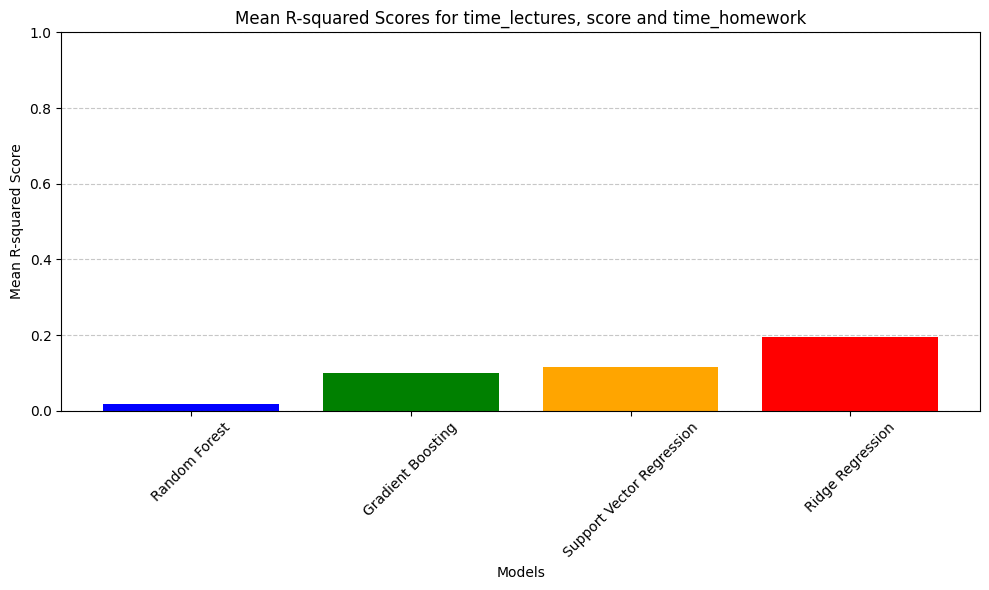

R-squared score for Random Forest with features time_lectures, time_homework and label: score: -10.18
R-squared score for Gradient Boosting with features time_lectures, time_homework and label: score: -7.88
R-squared score for Support Vector Regression with features time_lectures, time_homework and label: score: -6.35
R-squared score for Ridge Regression with features time_lectures, time_homework and label: score: -7.14


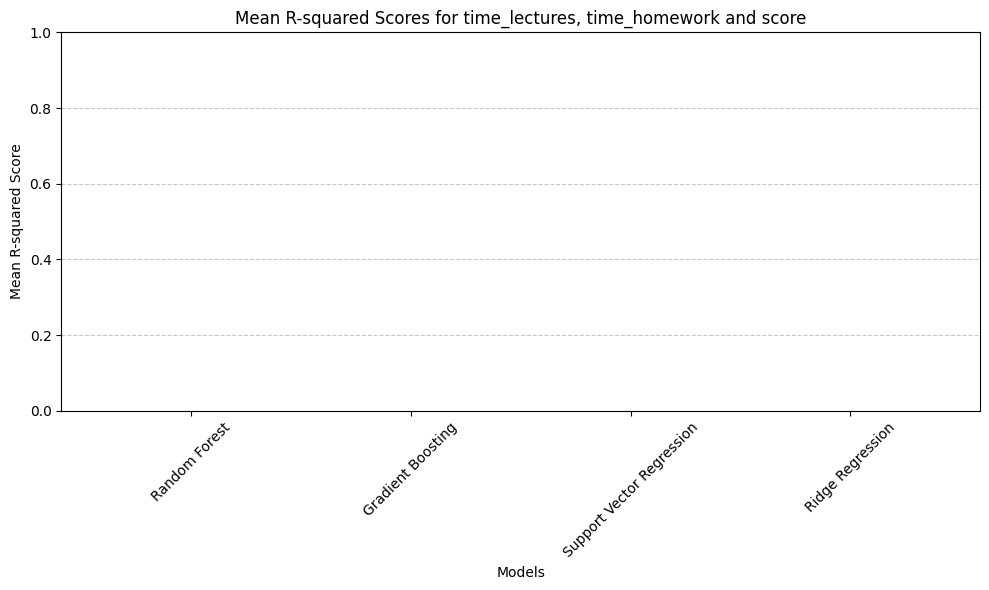

R-squared score for Random Forest with features score, time_homework and label: time_lectures: 0.15
R-squared score for Gradient Boosting with features score, time_homework and label: time_lectures: 0.15
R-squared score for Support Vector Regression with features score, time_homework and label: time_lectures: 0.20
R-squared score for Ridge Regression with features score, time_homework and label: time_lectures: 0.18


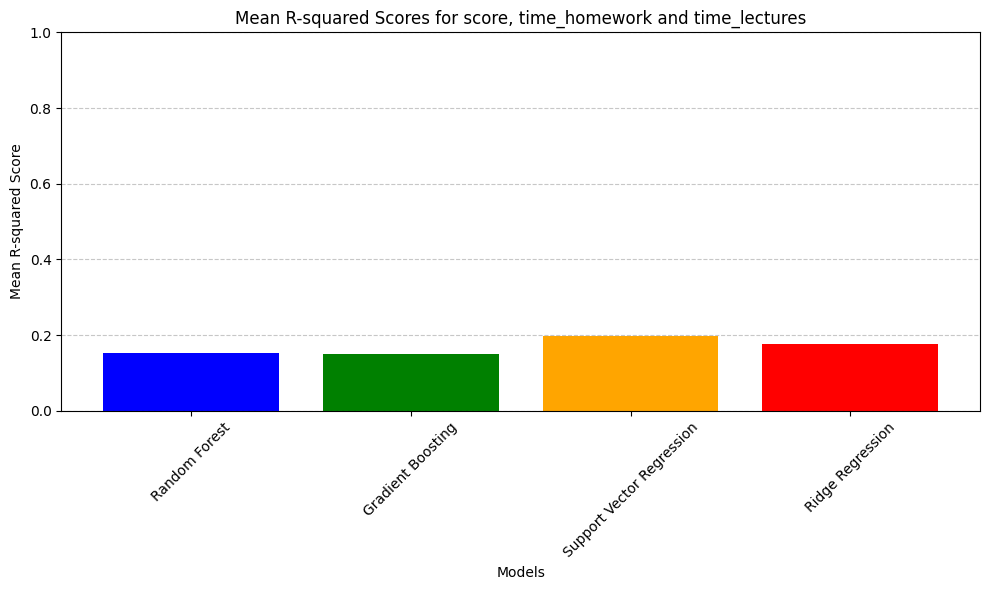

R-squared score for Random Forest with features score, time_lectures and label: time_homework: 0.08
R-squared score for Gradient Boosting with features score, time_lectures and label: time_homework: 0.10
R-squared score for Support Vector Regression with features score, time_lectures and label: time_homework: 0.12
R-squared score for Ridge Regression with features score, time_lectures and label: time_homework: 0.20


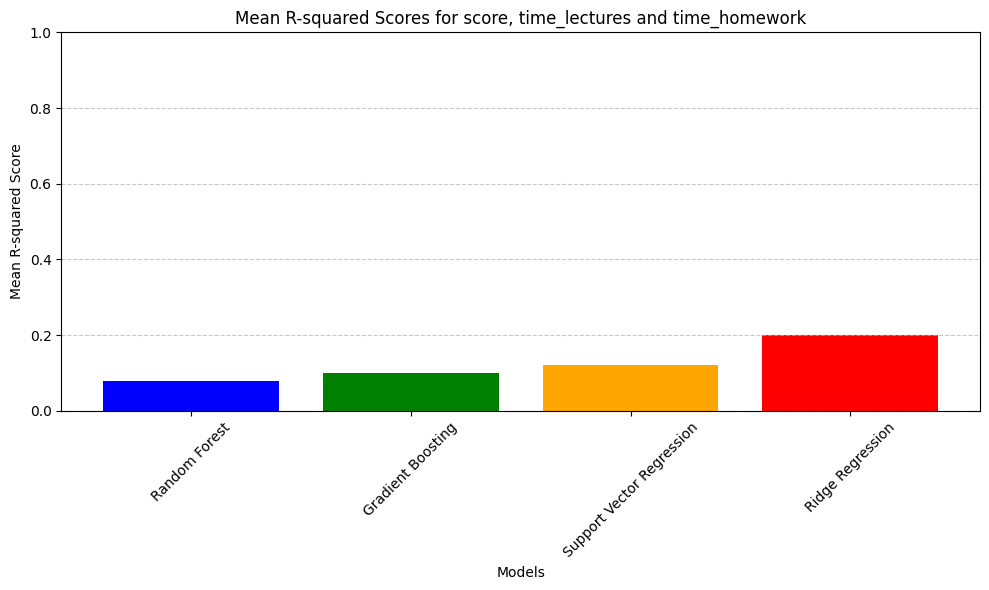

R-squared score for Random Forest with features time_homework, score and label: time_lectures: 0.14
R-squared score for Gradient Boosting with features time_homework, score and label: time_lectures: 0.15
R-squared score for Support Vector Regression with features time_homework, score and label: time_lectures: 0.20
R-squared score for Ridge Regression with features time_homework, score and label: time_lectures: 0.18


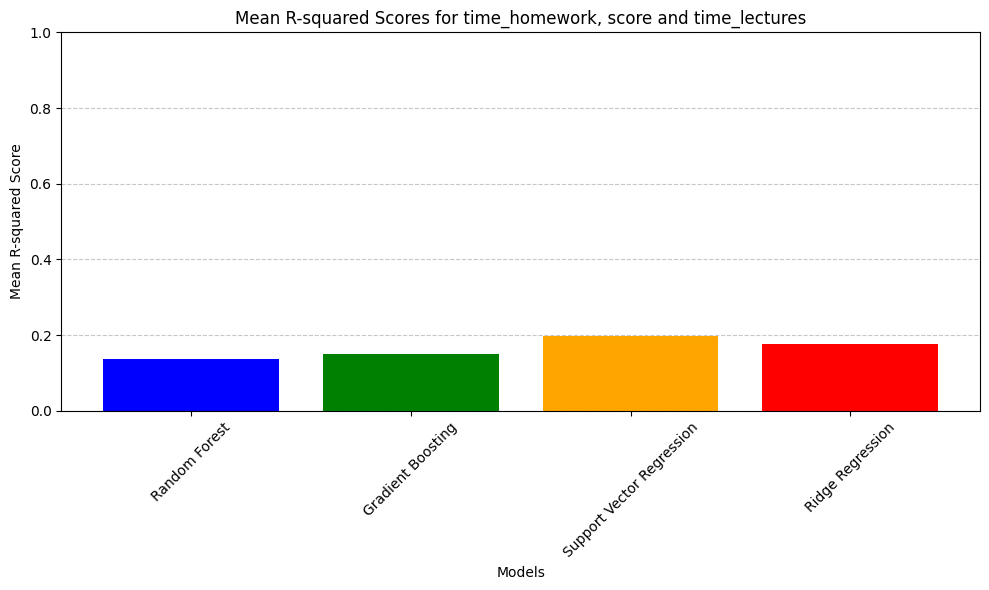

R-squared score for Random Forest with features time_homework, time_lectures and label: score: -77.21
R-squared score for Gradient Boosting with features time_homework, time_lectures and label: score: -73.41
R-squared score for Support Vector Regression with features time_homework, time_lectures and label: score: -190.75
R-squared score for Ridge Regression with features time_homework, time_lectures and label: score: -72.29


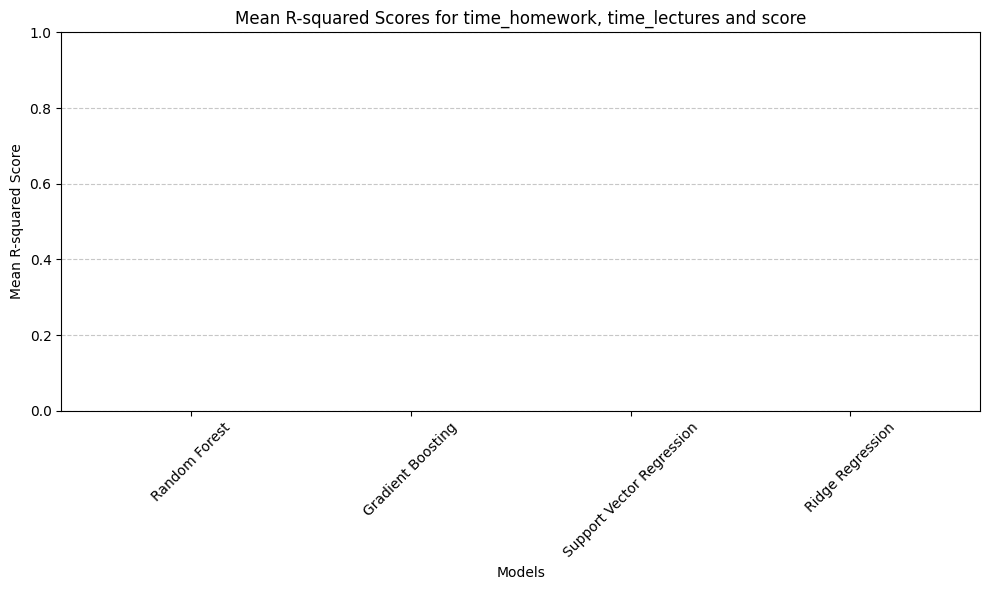

R-squared score for Random Forest with features time_lectures, score and label: time_homework: 0.08
R-squared score for Gradient Boosting with features time_lectures, score and label: time_homework: 0.10
R-squared score for Support Vector Regression with features time_lectures, score and label: time_homework: 0.12
R-squared score for Ridge Regression with features time_lectures, score and label: time_homework: 0.20


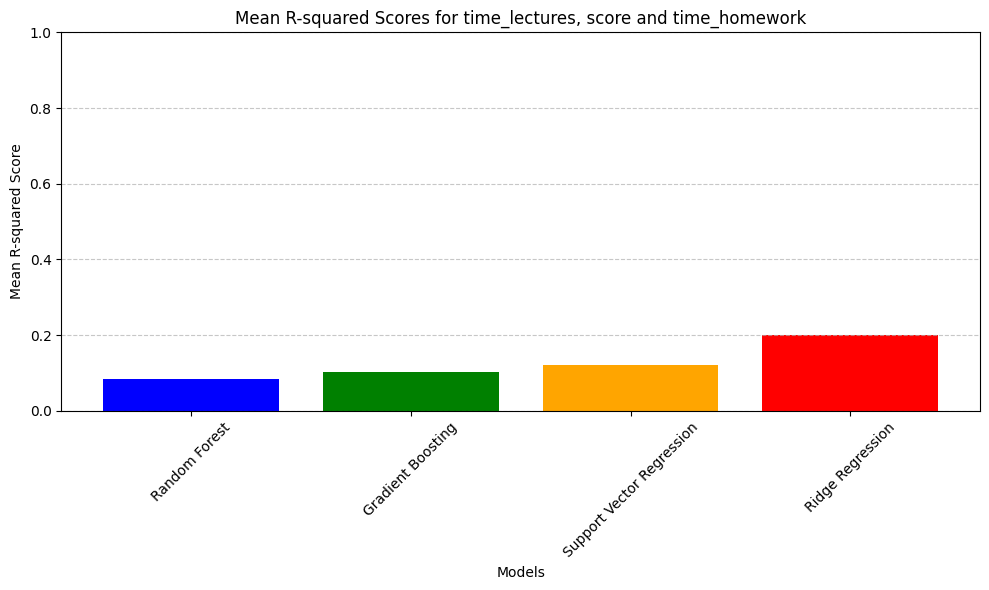

R-squared score for Random Forest with features time_lectures, time_homework and label: score: -76.99
R-squared score for Gradient Boosting with features time_lectures, time_homework and label: score: -73.42
R-squared score for Support Vector Regression with features time_lectures, time_homework and label: score: -190.75
R-squared score for Ridge Regression with features time_lectures, time_homework and label: score: -72.29


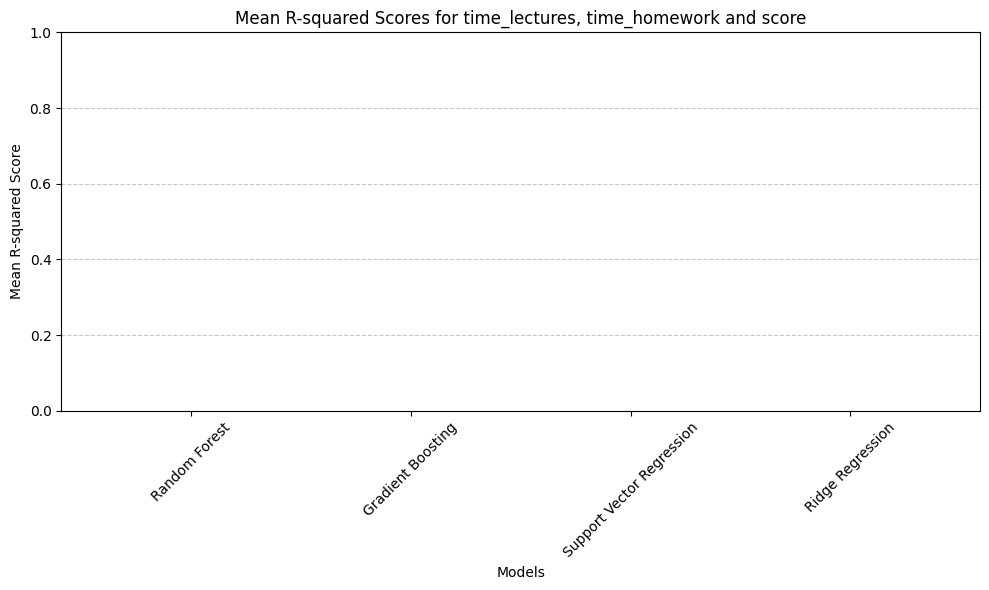

R-squared score for Random Forest with features score, time_homework and label: time_lectures: 0.23
R-squared score for Gradient Boosting with features score, time_homework and label: time_lectures: 0.24
R-squared score for Support Vector Regression with features score, time_homework and label: time_lectures: 0.20
R-squared score for Ridge Regression with features score, time_homework and label: time_lectures: 0.17


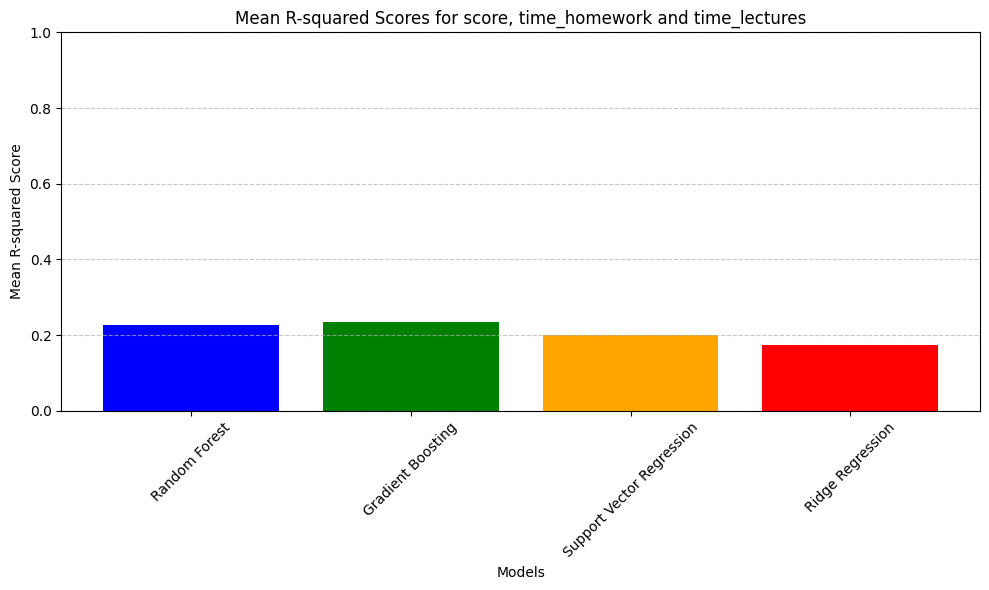

R-squared score for Random Forest with features score, time_lectures and label: time_homework: 0.07
R-squared score for Gradient Boosting with features score, time_lectures and label: time_homework: 0.05
R-squared score for Support Vector Regression with features score, time_lectures and label: time_homework: 0.12
R-squared score for Ridge Regression with features score, time_lectures and label: time_homework: 0.17


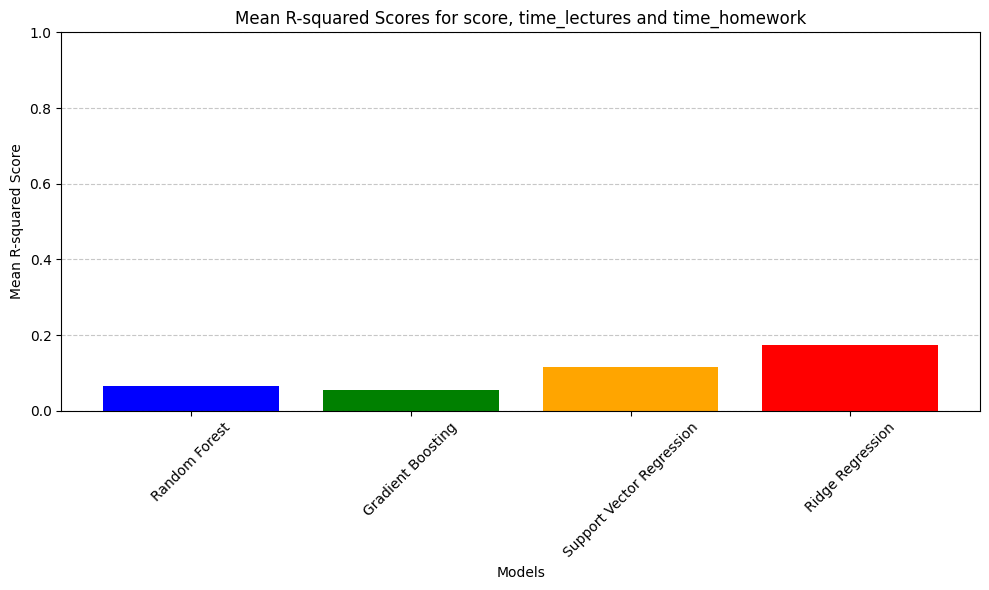

R-squared score for Random Forest with features time_homework, score and label: time_lectures: 0.22
R-squared score for Gradient Boosting with features time_homework, score and label: time_lectures: 0.23
R-squared score for Support Vector Regression with features time_homework, score and label: time_lectures: 0.20
R-squared score for Ridge Regression with features time_homework, score and label: time_lectures: 0.17


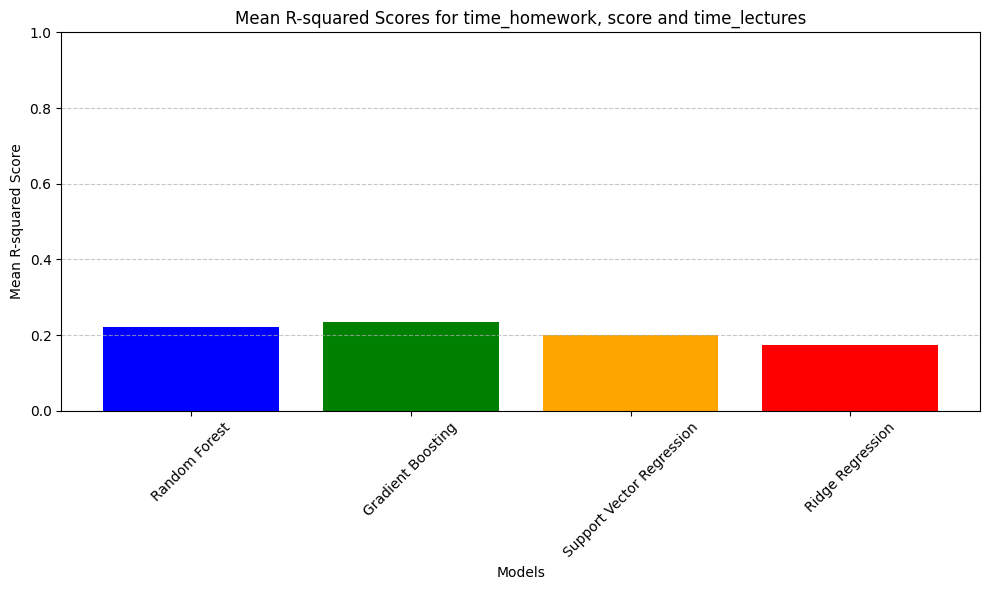

R-squared score for Random Forest with features time_homework, time_lectures and label: score: -23.94
R-squared score for Gradient Boosting with features time_homework, time_lectures and label: score: -23.24
R-squared score for Support Vector Regression with features time_homework, time_lectures and label: score: -49.62
R-squared score for Ridge Regression with features time_homework, time_lectures and label: score: -22.78


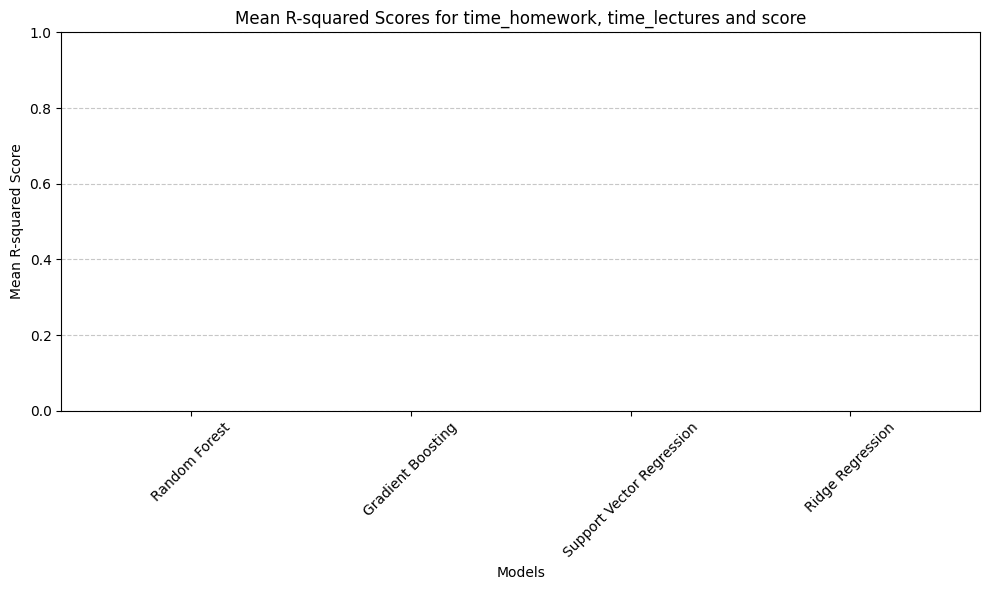

R-squared score for Random Forest with features time_lectures, score and label: time_homework: 0.07
R-squared score for Gradient Boosting with features time_lectures, score and label: time_homework: 0.06
R-squared score for Support Vector Regression with features time_lectures, score and label: time_homework: 0.12
R-squared score for Ridge Regression with features time_lectures, score and label: time_homework: 0.17


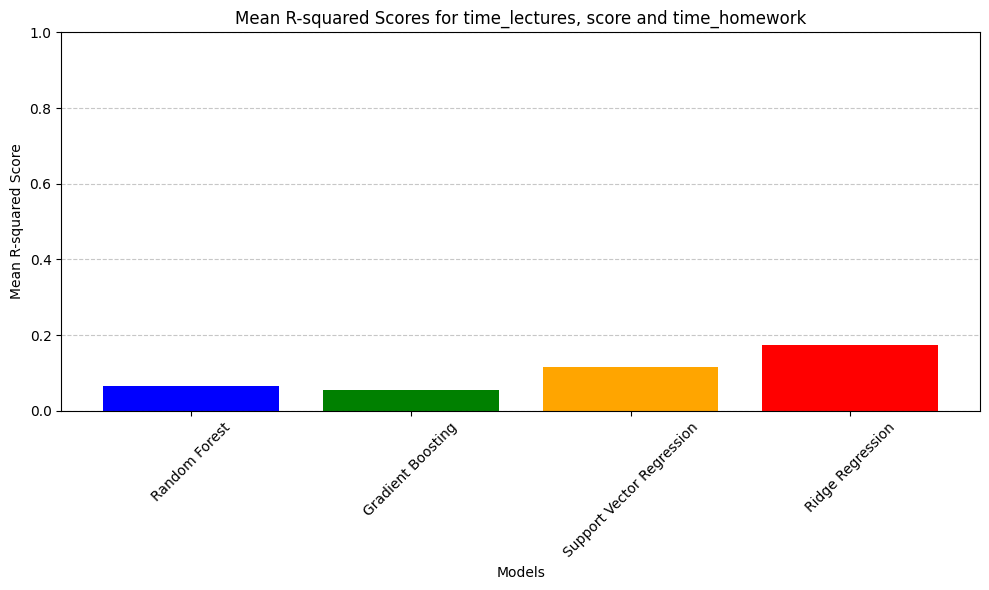

R-squared score for Random Forest with features time_lectures, time_homework and label: score: -23.97
R-squared score for Gradient Boosting with features time_lectures, time_homework and label: score: -23.22
R-squared score for Support Vector Regression with features time_lectures, time_homework and label: score: -49.62
R-squared score for Ridge Regression with features time_lectures, time_homework and label: score: -22.78


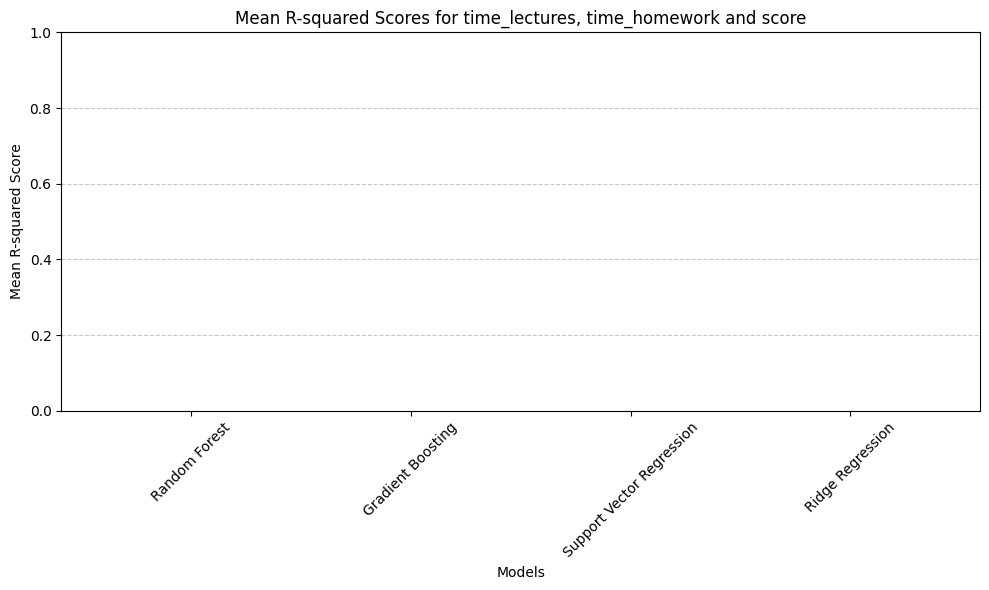

R-squared score for Random Forest with features score, time_homework and label: time_lectures: 0.21
R-squared score for Gradient Boosting with features score, time_homework and label: time_lectures: 0.24
R-squared score for Support Vector Regression with features score, time_homework and label: time_lectures: 0.19
R-squared score for Ridge Regression with features score, time_homework and label: time_lectures: 0.18


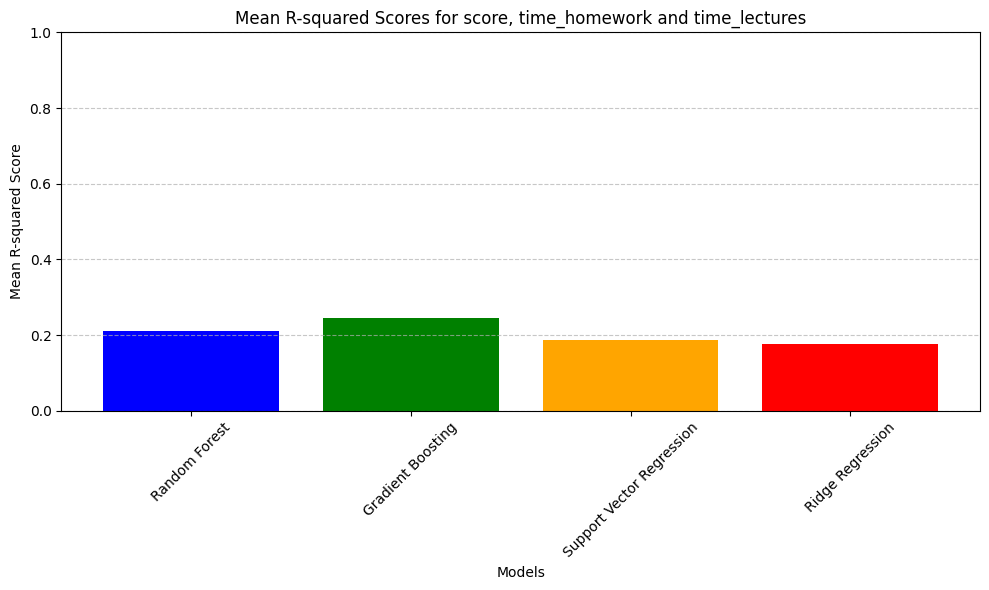

R-squared score for Random Forest with features score, time_lectures and label: time_homework: 0.10
R-squared score for Gradient Boosting with features score, time_lectures and label: time_homework: 0.09
R-squared score for Support Vector Regression with features score, time_lectures and label: time_homework: 0.11
R-squared score for Ridge Regression with features score, time_lectures and label: time_homework: 0.18


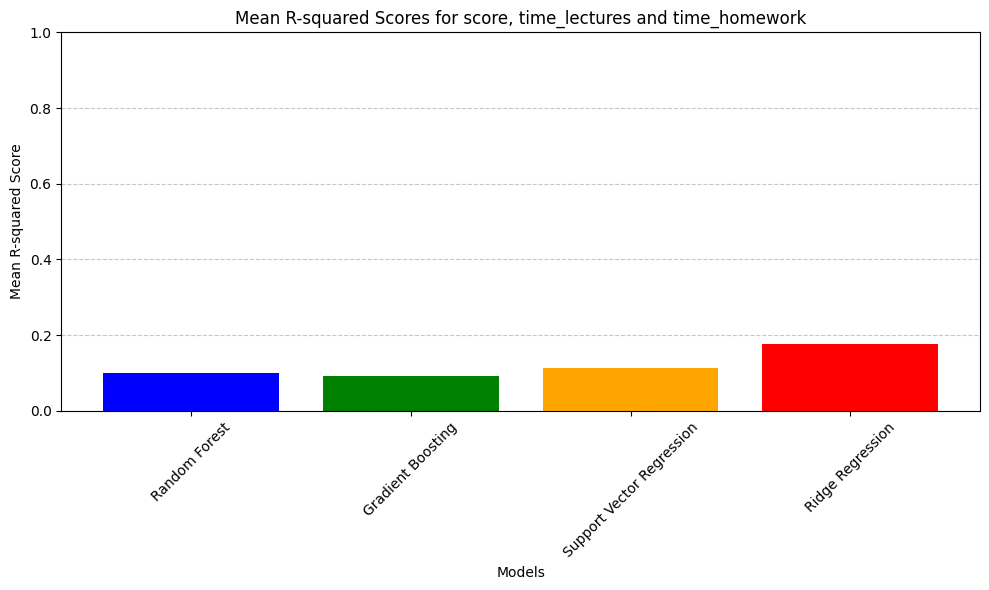

R-squared score for Random Forest with features time_homework, score and label: time_lectures: 0.20
R-squared score for Gradient Boosting with features time_homework, score and label: time_lectures: 0.24
R-squared score for Support Vector Regression with features time_homework, score and label: time_lectures: 0.19
R-squared score for Ridge Regression with features time_homework, score and label: time_lectures: 0.18


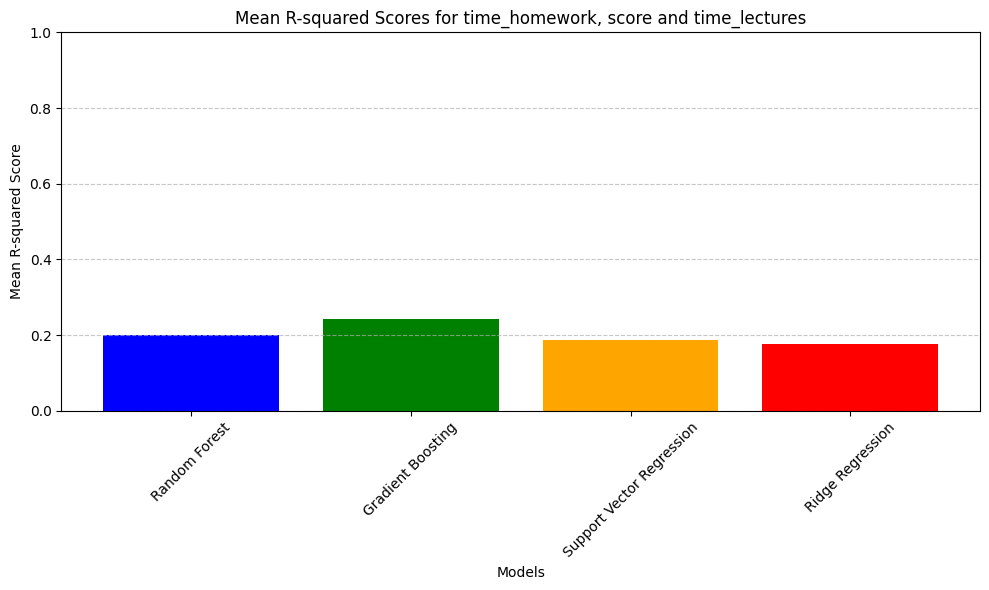

R-squared score for Random Forest with features time_homework, time_lectures and label: score: -1.39
R-squared score for Gradient Boosting with features time_homework, time_lectures and label: score: -1.37
R-squared score for Support Vector Regression with features time_homework, time_lectures and label: score: -1.80
R-squared score for Ridge Regression with features time_homework, time_lectures and label: score: -1.37


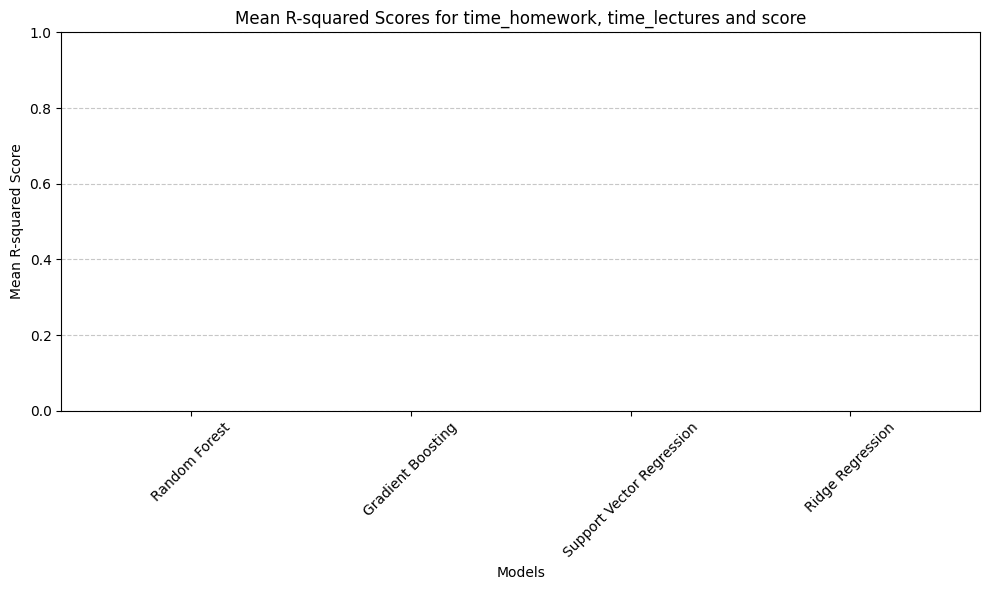

R-squared score for Random Forest with features time_lectures, score and label: time_homework: 0.10
R-squared score for Gradient Boosting with features time_lectures, score and label: time_homework: 0.09
R-squared score for Support Vector Regression with features time_lectures, score and label: time_homework: 0.11
R-squared score for Ridge Regression with features time_lectures, score and label: time_homework: 0.18


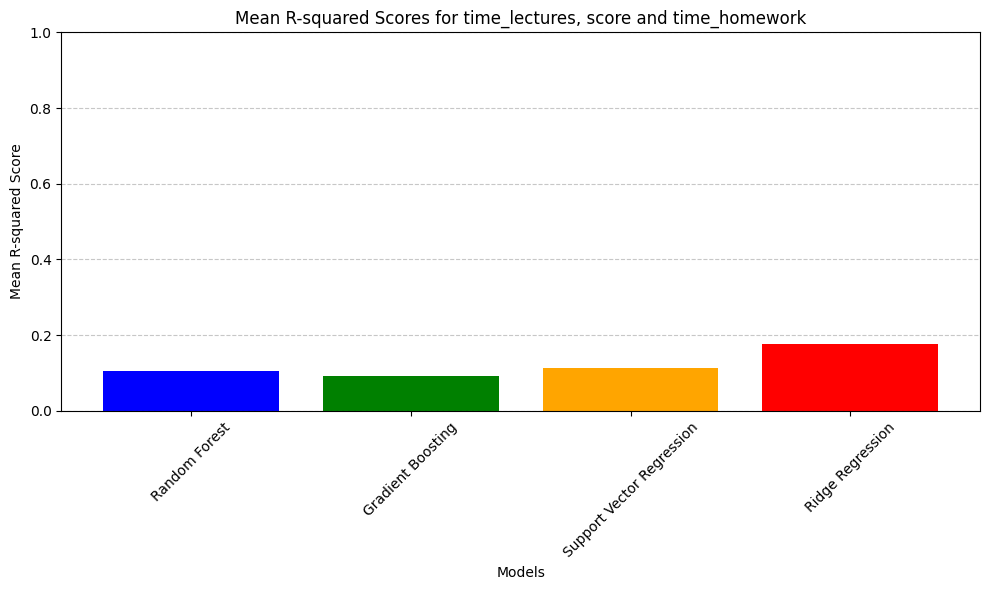

R-squared score for Random Forest with features time_lectures, time_homework and label: score: -1.38
R-squared score for Gradient Boosting with features time_lectures, time_homework and label: score: -1.37
R-squared score for Support Vector Regression with features time_lectures, time_homework and label: score: -1.80
R-squared score for Ridge Regression with features time_lectures, time_homework and label: score: -1.37


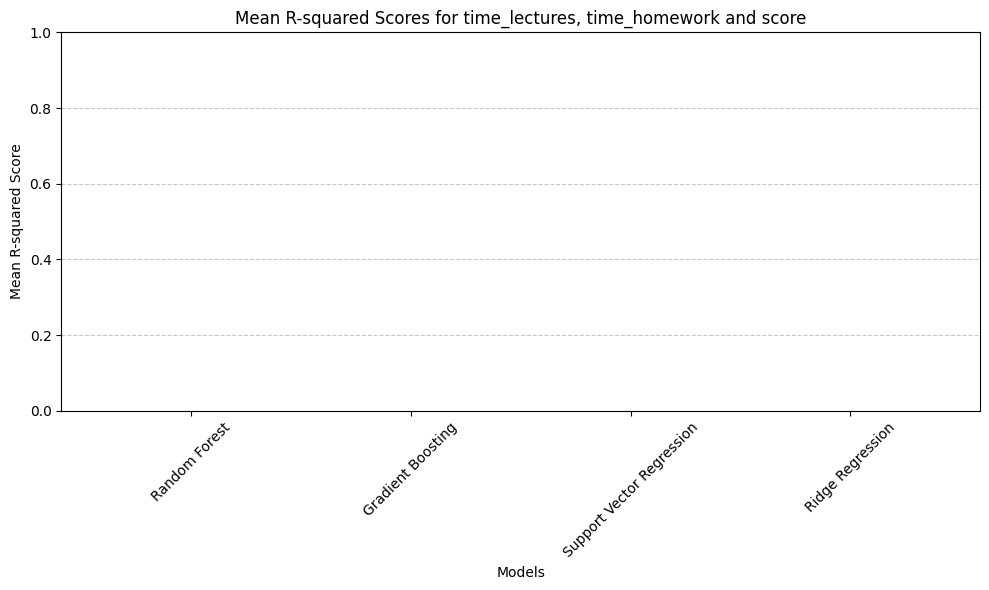

R-squared score for Random Forest with features score, time_homework and label: time_lectures: 0.06
R-squared score for Gradient Boosting with features score, time_homework and label: time_lectures: 0.04
R-squared score for Support Vector Regression with features score, time_homework and label: time_lectures: 0.20
R-squared score for Ridge Regression with features score, time_homework and label: time_lectures: 0.16


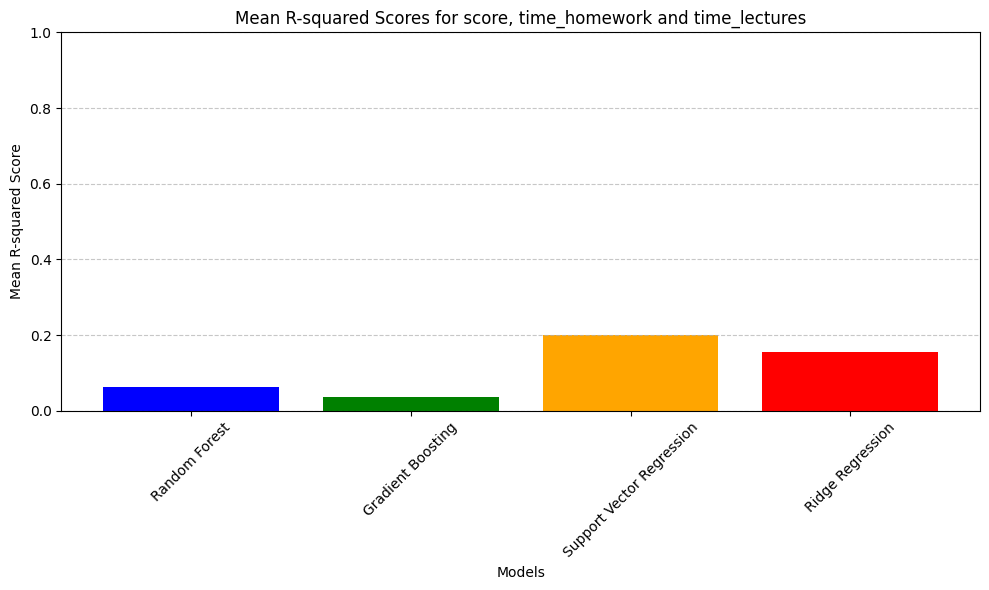

R-squared score for Random Forest with features score, time_lectures and label: time_homework: 0.08
R-squared score for Gradient Boosting with features score, time_lectures and label: time_homework: 0.05
R-squared score for Support Vector Regression with features score, time_lectures and label: time_homework: 0.11
R-squared score for Ridge Regression with features score, time_lectures and label: time_homework: 0.19


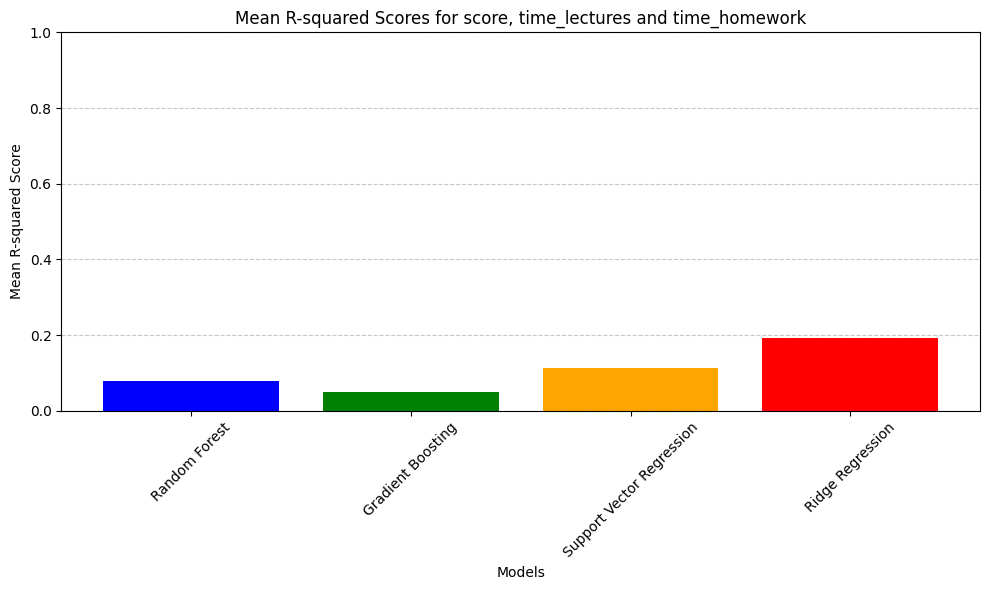

R-squared score for Random Forest with features time_homework, score and label: time_lectures: 0.07
R-squared score for Gradient Boosting with features time_homework, score and label: time_lectures: 0.04
R-squared score for Support Vector Regression with features time_homework, score and label: time_lectures: 0.20
R-squared score for Ridge Regression with features time_homework, score and label: time_lectures: 0.16


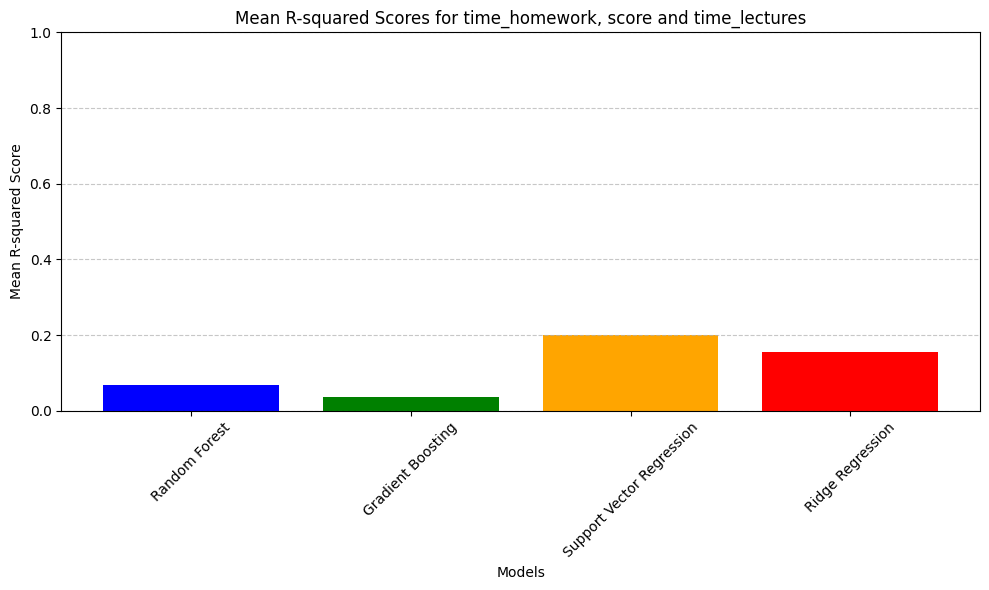

R-squared score for Random Forest with features time_homework, time_lectures and label: score: -1.83
R-squared score for Gradient Boosting with features time_homework, time_lectures and label: score: -1.81
R-squared score for Support Vector Regression with features time_homework, time_lectures and label: score: -2.41
R-squared score for Ridge Regression with features time_homework, time_lectures and label: score: -1.80


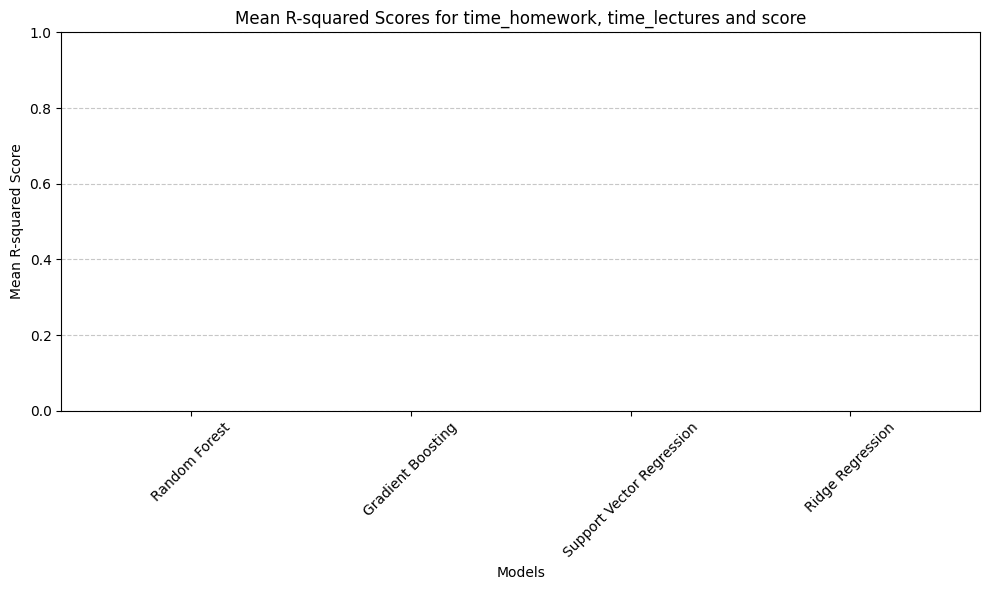

R-squared score for Random Forest with features time_lectures, score and label: time_homework: 0.08
R-squared score for Gradient Boosting with features time_lectures, score and label: time_homework: 0.05
R-squared score for Support Vector Regression with features time_lectures, score and label: time_homework: 0.11
R-squared score for Ridge Regression with features time_lectures, score and label: time_homework: 0.19


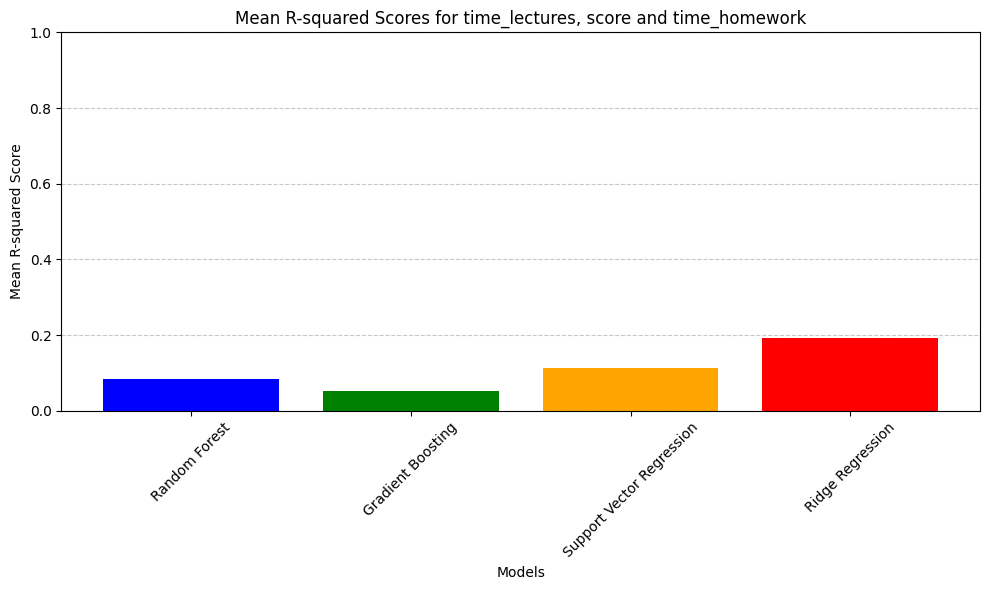

R-squared score for Random Forest with features time_lectures, time_homework and label: score: -1.83
R-squared score for Gradient Boosting with features time_lectures, time_homework and label: score: -1.81
R-squared score for Support Vector Regression with features time_lectures, time_homework and label: score: -2.41
R-squared score for Ridge Regression with features time_lectures, time_homework and label: score: -1.80


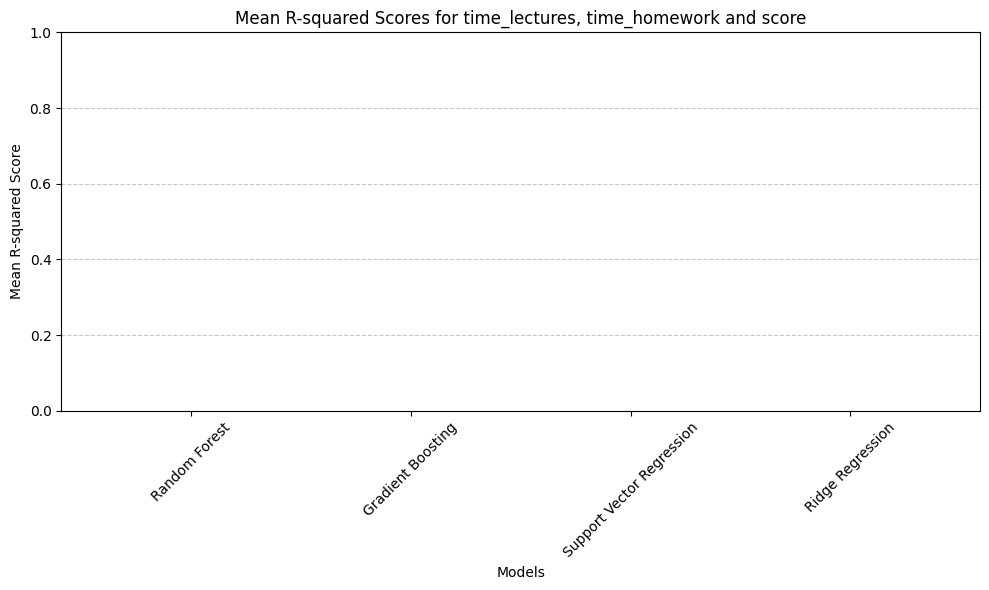

R-squared score for Random Forest with features score, time_homework and label: time_lectures: 0.18
R-squared score for Gradient Boosting with features score, time_homework and label: time_lectures: 0.17
R-squared score for Support Vector Regression with features score, time_homework and label: time_lectures: 0.19
R-squared score for Ridge Regression with features score, time_homework and label: time_lectures: 0.20


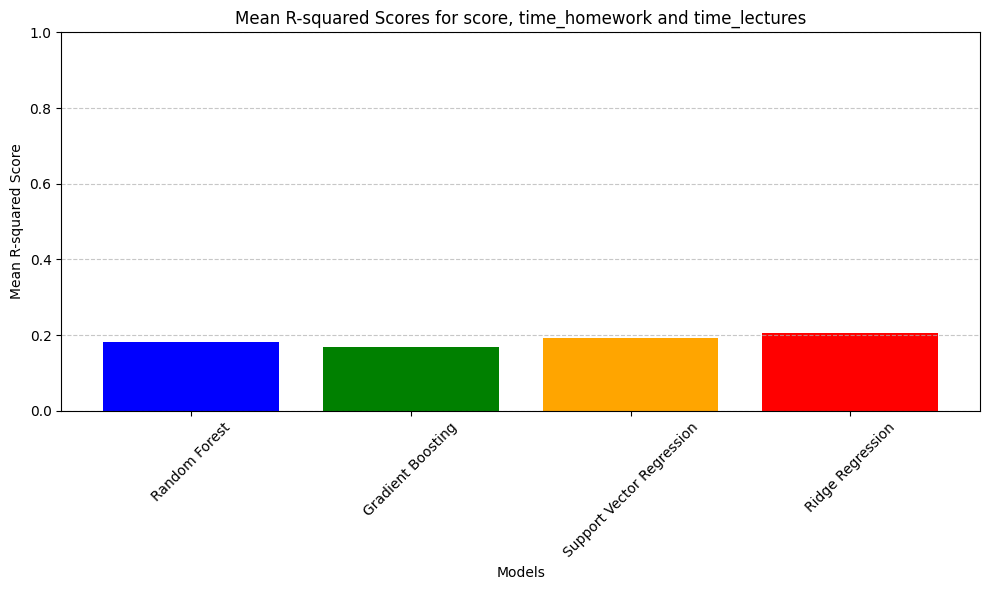

R-squared score for Random Forest with features score, time_lectures and label: time_homework: 0.13
R-squared score for Gradient Boosting with features score, time_lectures and label: time_homework: 0.11
R-squared score for Support Vector Regression with features score, time_lectures and label: time_homework: 0.10
R-squared score for Ridge Regression with features score, time_lectures and label: time_homework: 0.22


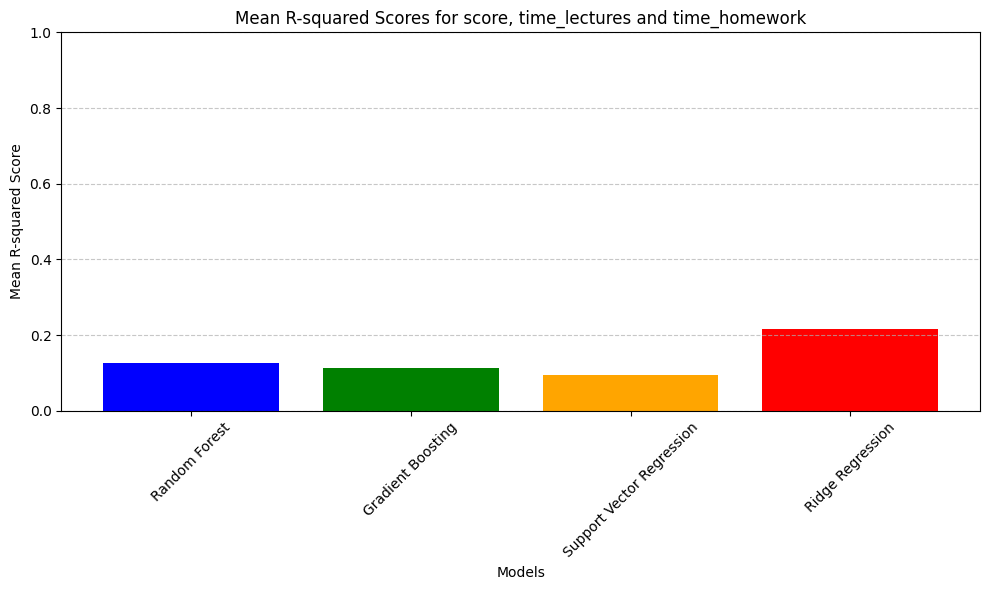

R-squared score for Random Forest with features time_homework, score and label: time_lectures: 0.18
R-squared score for Gradient Boosting with features time_homework, score and label: time_lectures: 0.17
R-squared score for Support Vector Regression with features time_homework, score and label: time_lectures: 0.19
R-squared score for Ridge Regression with features time_homework, score and label: time_lectures: 0.20


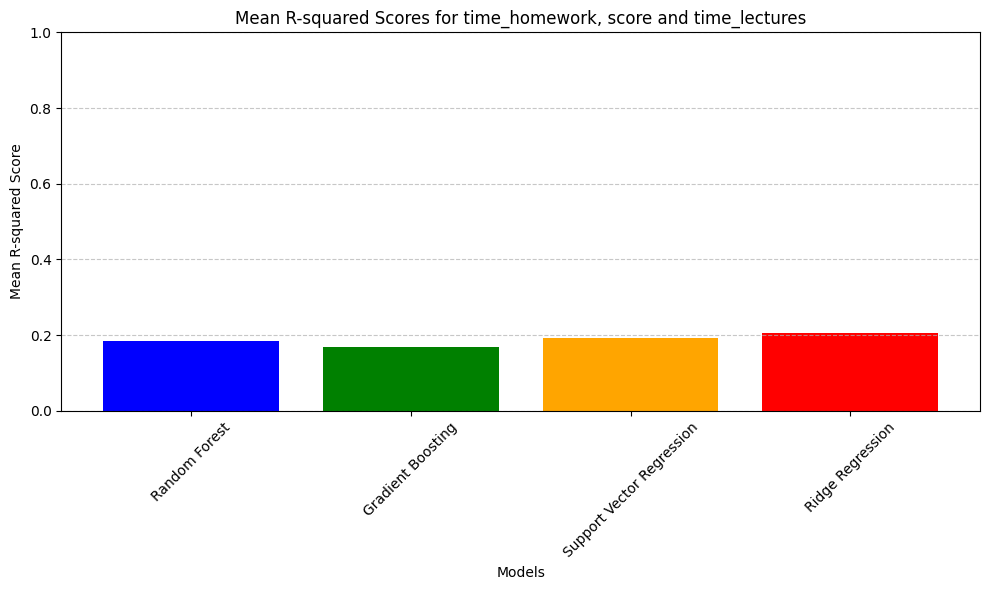

R-squared score for Random Forest with features time_homework, time_lectures and label: score: -0.20
R-squared score for Gradient Boosting with features time_homework, time_lectures and label: score: -0.20
R-squared score for Support Vector Regression with features time_homework, time_lectures and label: score: -0.20
R-squared score for Ridge Regression with features time_homework, time_lectures and label: score: -0.20


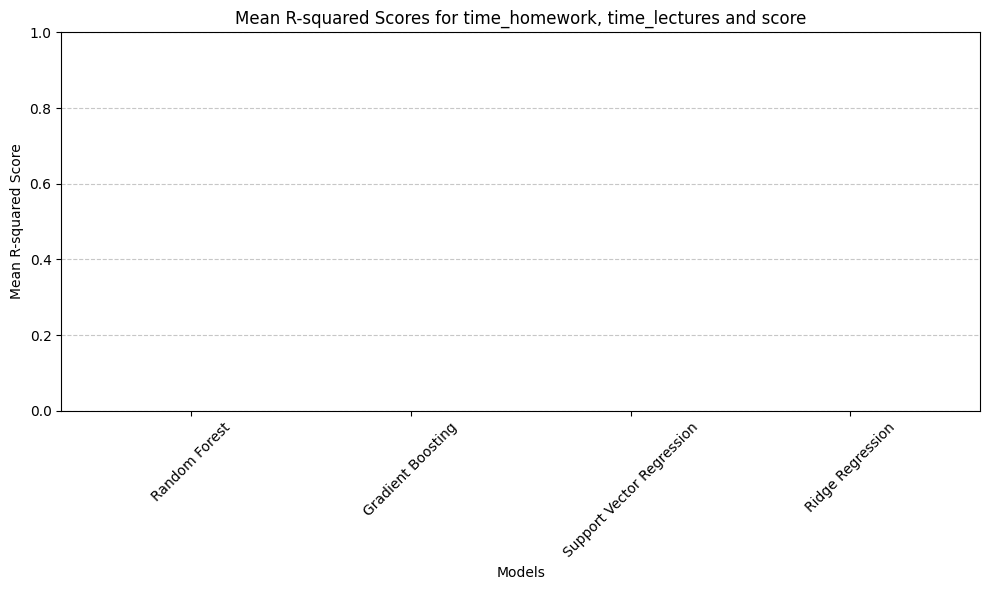

R-squared score for Random Forest with features time_lectures, score and label: time_homework: 0.12
R-squared score for Gradient Boosting with features time_lectures, score and label: time_homework: 0.12
R-squared score for Support Vector Regression with features time_lectures, score and label: time_homework: 0.10
R-squared score for Ridge Regression with features time_lectures, score and label: time_homework: 0.22


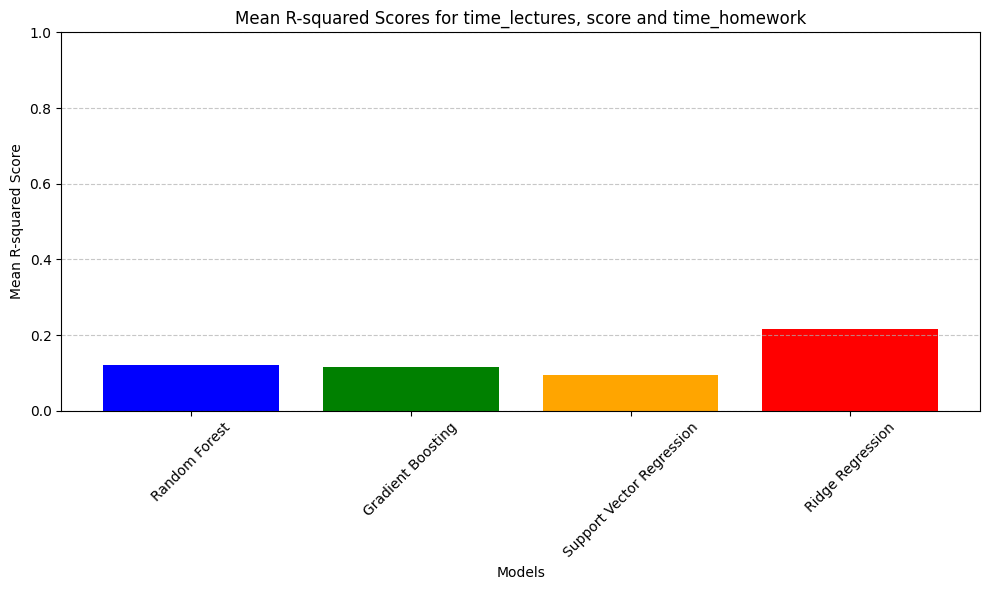

R-squared score for Random Forest with features time_lectures, time_homework and label: score: -0.20
R-squared score for Gradient Boosting with features time_lectures, time_homework and label: score: -0.20
R-squared score for Support Vector Regression with features time_lectures, time_homework and label: score: -0.20
R-squared score for Ridge Regression with features time_lectures, time_homework and label: score: -0.20


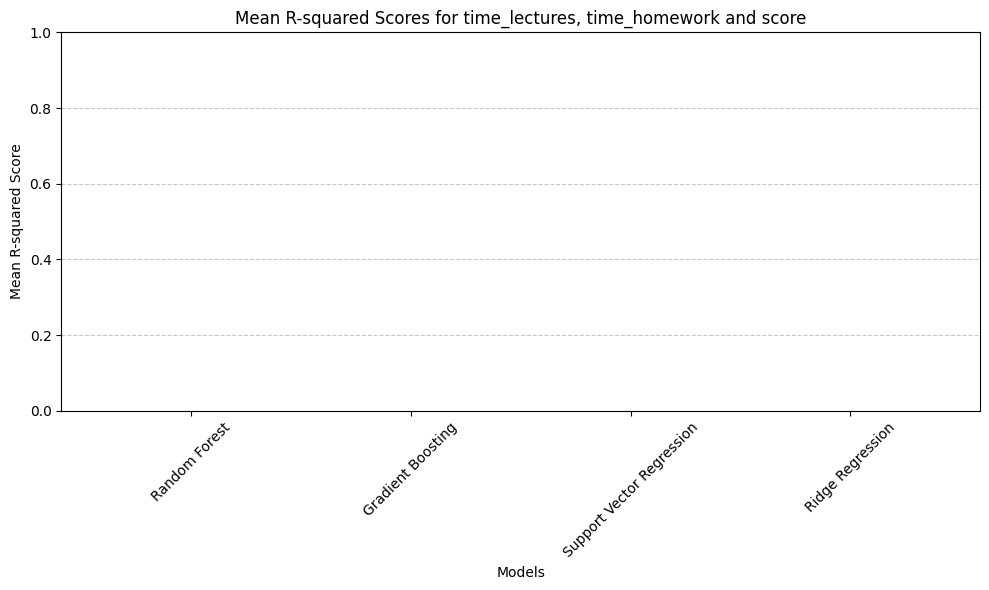

R-squared score for Random Forest with features score, time_homework and label: time_lectures: 0.19
R-squared score for Gradient Boosting with features score, time_homework and label: time_lectures: 0.18
R-squared score for Support Vector Regression with features score, time_homework and label: time_lectures: 0.23
R-squared score for Ridge Regression with features score, time_homework and label: time_lectures: 0.16


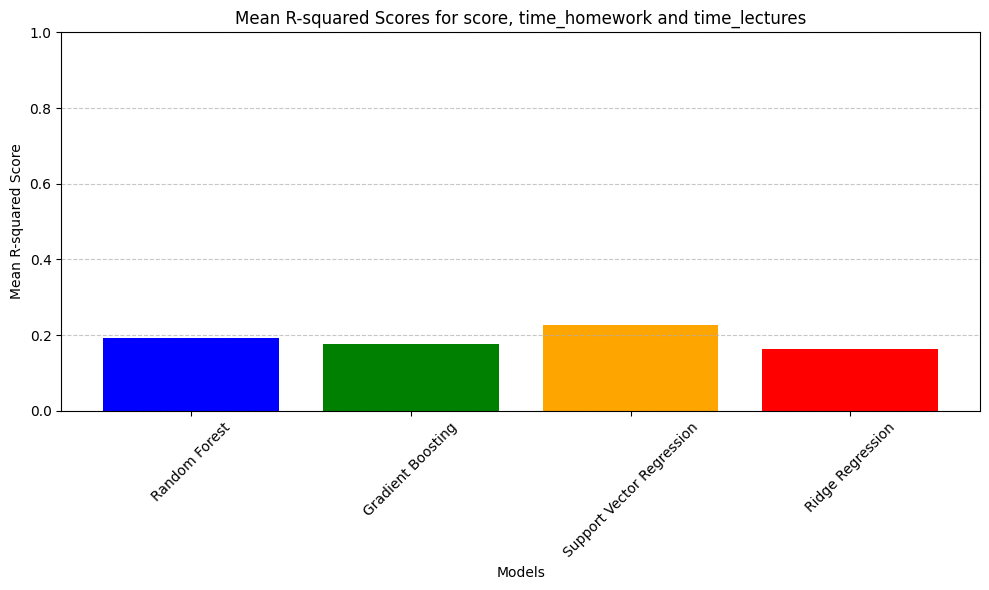

R-squared score for Random Forest with features score, time_lectures and label: time_homework: 0.15
R-squared score for Gradient Boosting with features score, time_lectures and label: time_homework: 0.12
R-squared score for Support Vector Regression with features score, time_lectures and label: time_homework: 0.15
R-squared score for Ridge Regression with features score, time_lectures and label: time_homework: 0.19


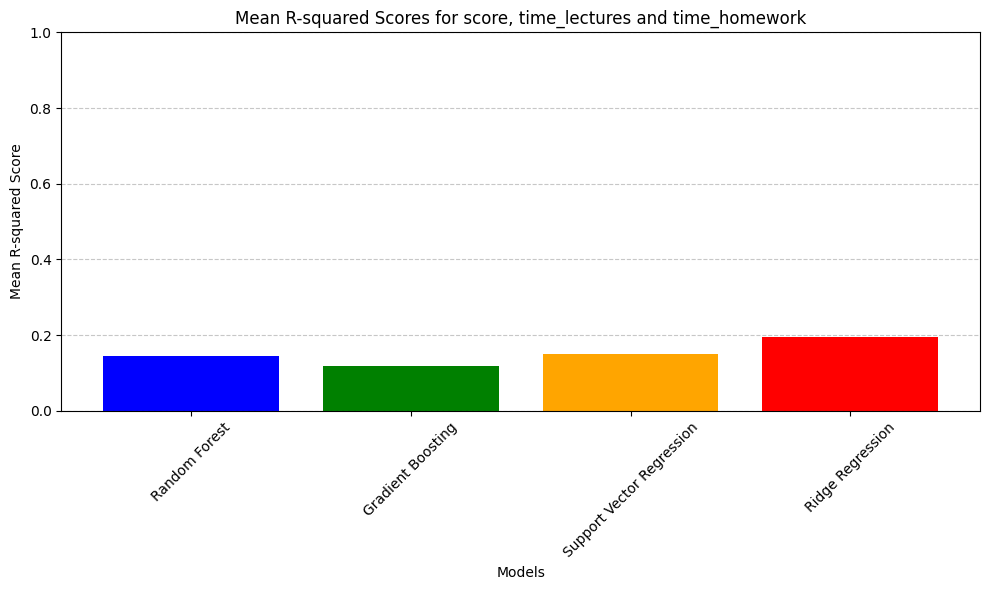

R-squared score for Random Forest with features time_homework, score and label: time_lectures: 0.18
R-squared score for Gradient Boosting with features time_homework, score and label: time_lectures: 0.18
R-squared score for Support Vector Regression with features time_homework, score and label: time_lectures: 0.23
R-squared score for Ridge Regression with features time_homework, score and label: time_lectures: 0.16


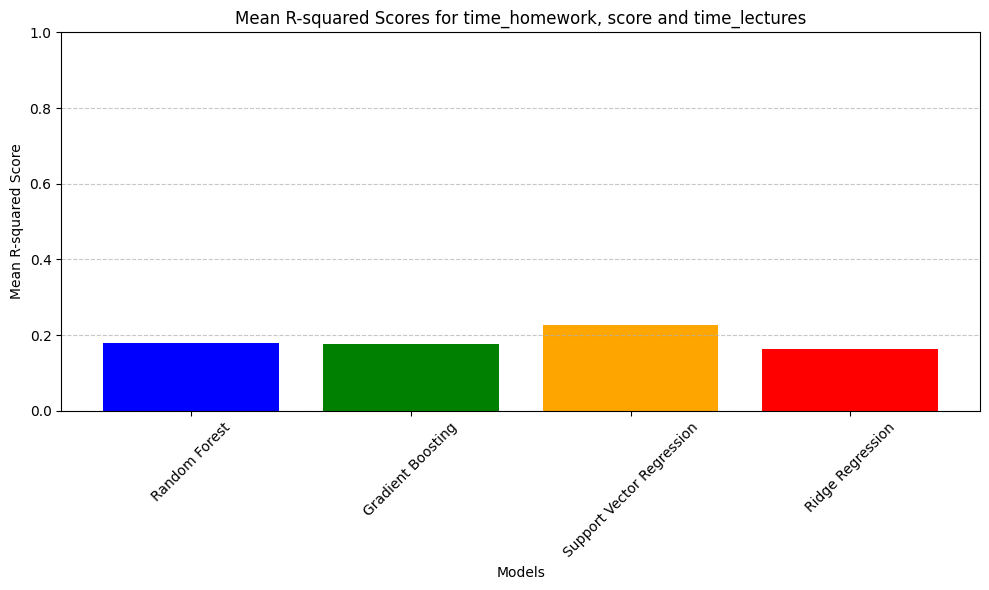

R-squared score for Random Forest with features time_homework, time_lectures and label: score: -0.05
R-squared score for Gradient Boosting with features time_homework, time_lectures and label: score: -0.05
R-squared score for Support Vector Regression with features time_homework, time_lectures and label: score: -0.05
R-squared score for Ridge Regression with features time_homework, time_lectures and label: score: -0.05


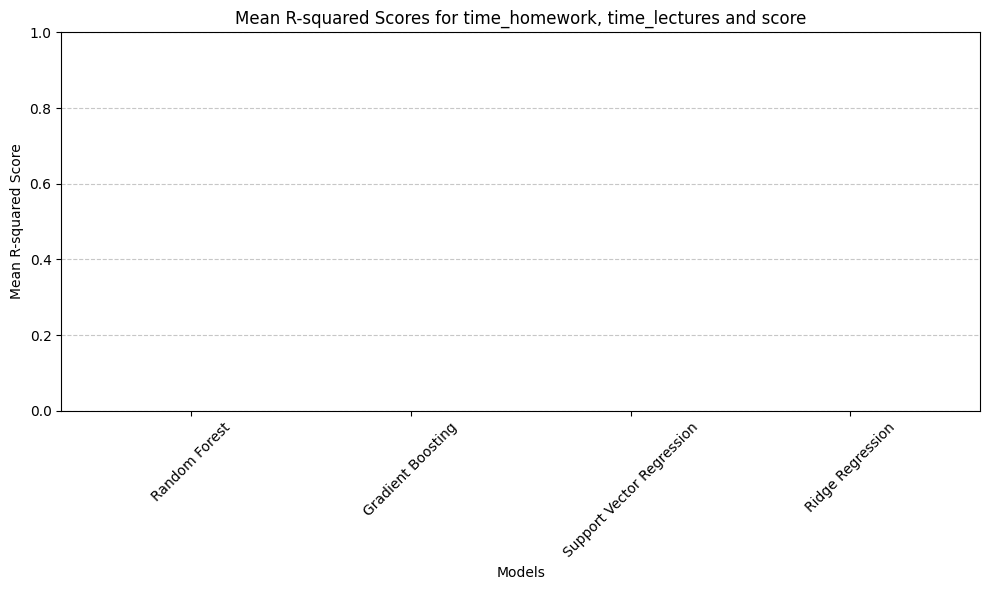

R-squared score for Random Forest with features time_lectures, score and label: time_homework: 0.14
R-squared score for Gradient Boosting with features time_lectures, score and label: time_homework: 0.12
R-squared score for Support Vector Regression with features time_lectures, score and label: time_homework: 0.15
R-squared score for Ridge Regression with features time_lectures, score and label: time_homework: 0.19


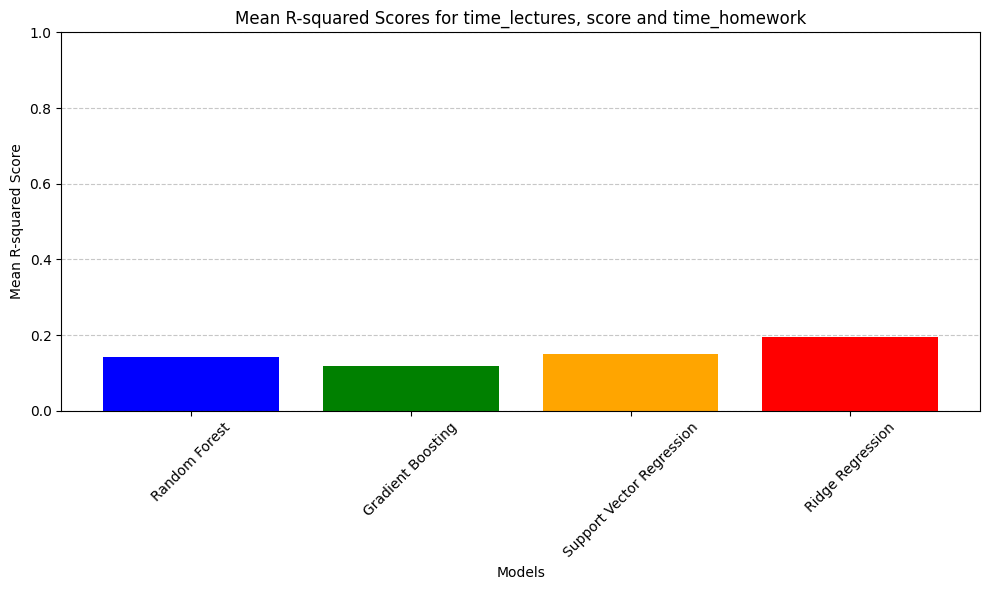

R-squared score for Random Forest with features time_lectures, time_homework and label: score: -0.05
R-squared score for Gradient Boosting with features time_lectures, time_homework and label: score: -0.05
R-squared score for Support Vector Regression with features time_lectures, time_homework and label: score: -0.05
R-squared score for Ridge Regression with features time_lectures, time_homework and label: score: -0.05


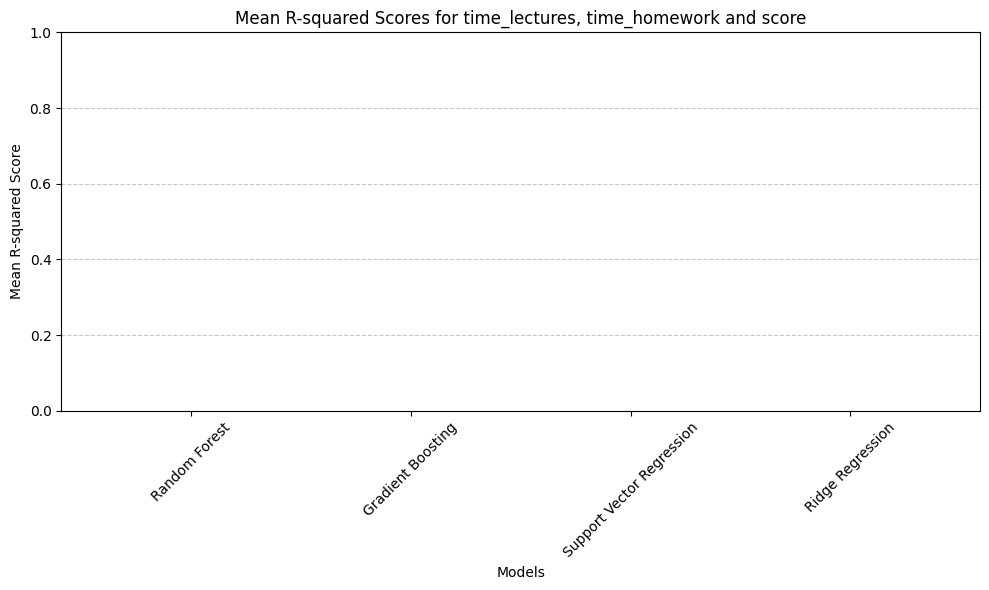

R-squared score for Random Forest with features score, time_homework and label: time_lectures: 0.13
R-squared score for Gradient Boosting with features score, time_homework and label: time_lectures: 0.16
R-squared score for Support Vector Regression with features score, time_homework and label: time_lectures: 0.21
R-squared score for Ridge Regression with features score, time_homework and label: time_lectures: 0.10


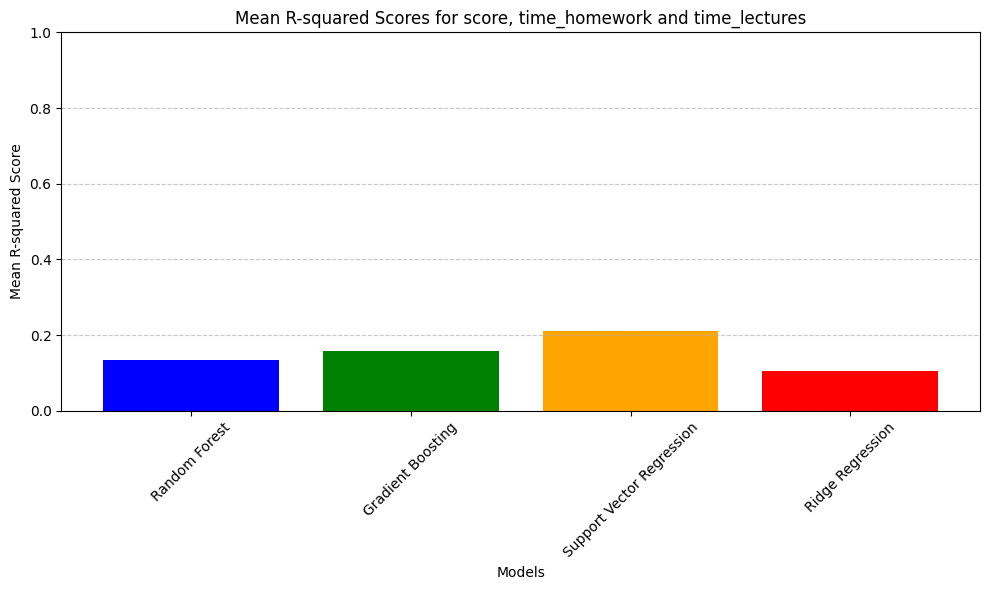

R-squared score for Random Forest with features score, time_lectures and label: time_homework: 0.16
R-squared score for Gradient Boosting with features score, time_lectures and label: time_homework: 0.17
R-squared score for Support Vector Regression with features score, time_lectures and label: time_homework: 0.12
R-squared score for Ridge Regression with features score, time_lectures and label: time_homework: 0.21


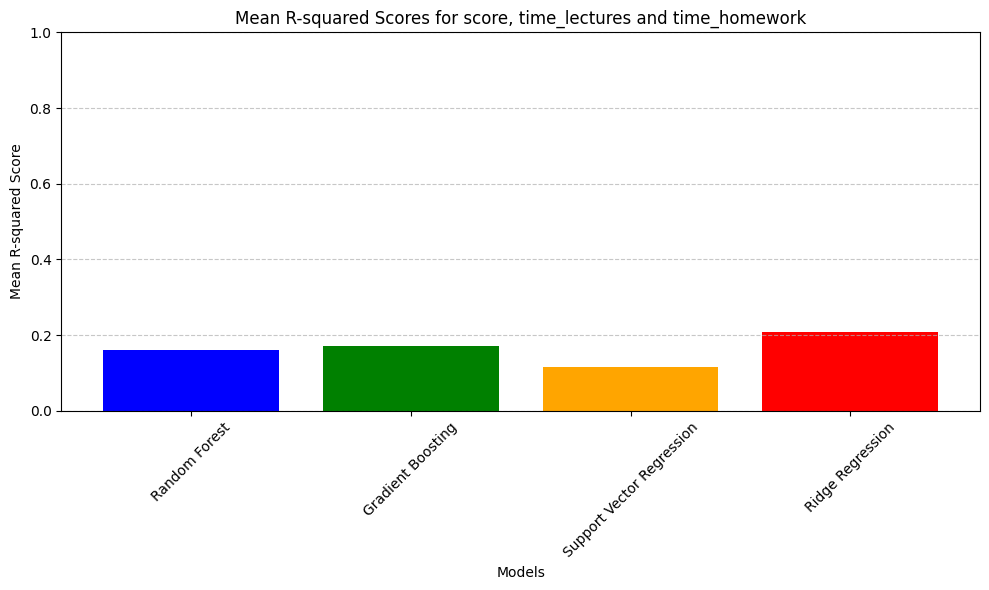

R-squared score for Random Forest with features time_homework, score and label: time_lectures: 0.12
R-squared score for Gradient Boosting with features time_homework, score and label: time_lectures: 0.15
R-squared score for Support Vector Regression with features time_homework, score and label: time_lectures: 0.21
R-squared score for Ridge Regression with features time_homework, score and label: time_lectures: 0.10


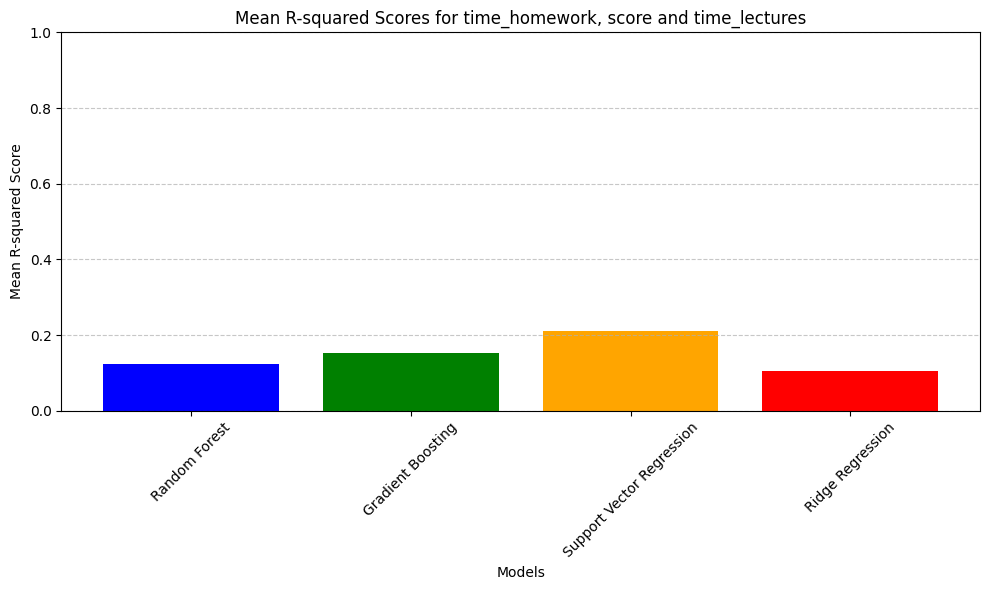

R-squared score for Random Forest with features time_homework, time_lectures and label: score: -5.48
R-squared score for Gradient Boosting with features time_homework, time_lectures and label: score: -5.42
R-squared score for Support Vector Regression with features time_homework, time_lectures and label: score: -6.48
R-squared score for Ridge Regression with features time_homework, time_lectures and label: score: -5.42


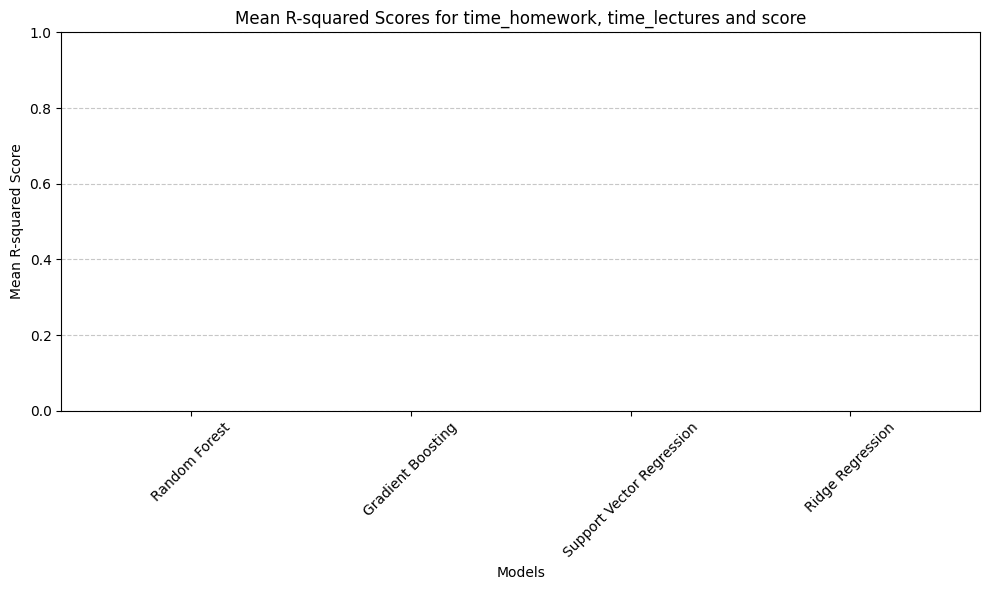

R-squared score for Random Forest with features time_lectures, score and label: time_homework: 0.17
R-squared score for Gradient Boosting with features time_lectures, score and label: time_homework: 0.17
R-squared score for Support Vector Regression with features time_lectures, score and label: time_homework: 0.12
R-squared score for Ridge Regression with features time_lectures, score and label: time_homework: 0.21


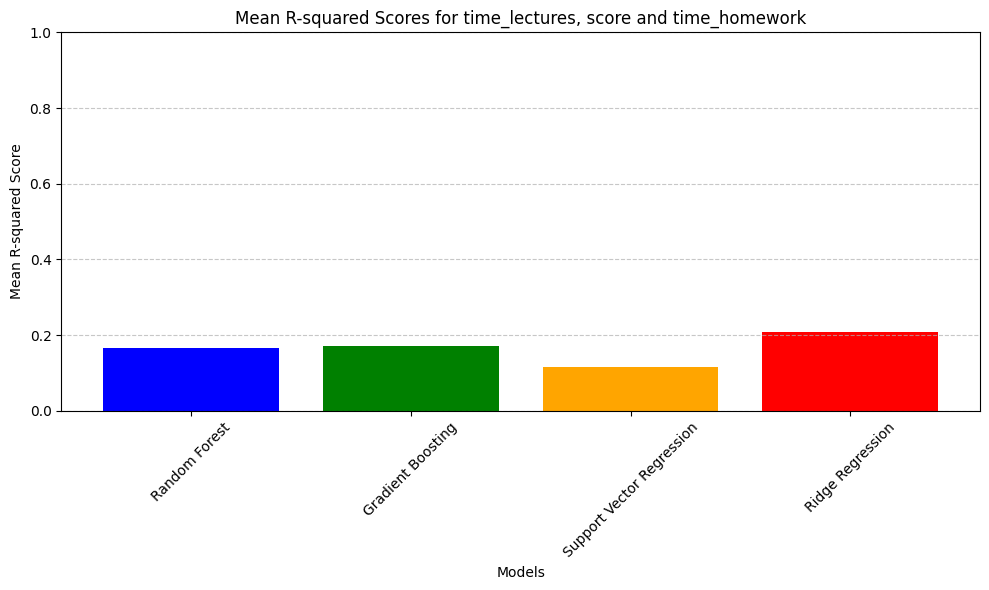

R-squared score for Random Forest with features time_lectures, time_homework and label: score: -5.48
R-squared score for Gradient Boosting with features time_lectures, time_homework and label: score: -5.42
R-squared score for Support Vector Regression with features time_lectures, time_homework and label: score: -6.48
R-squared score for Ridge Regression with features time_lectures, time_homework and label: score: -5.42


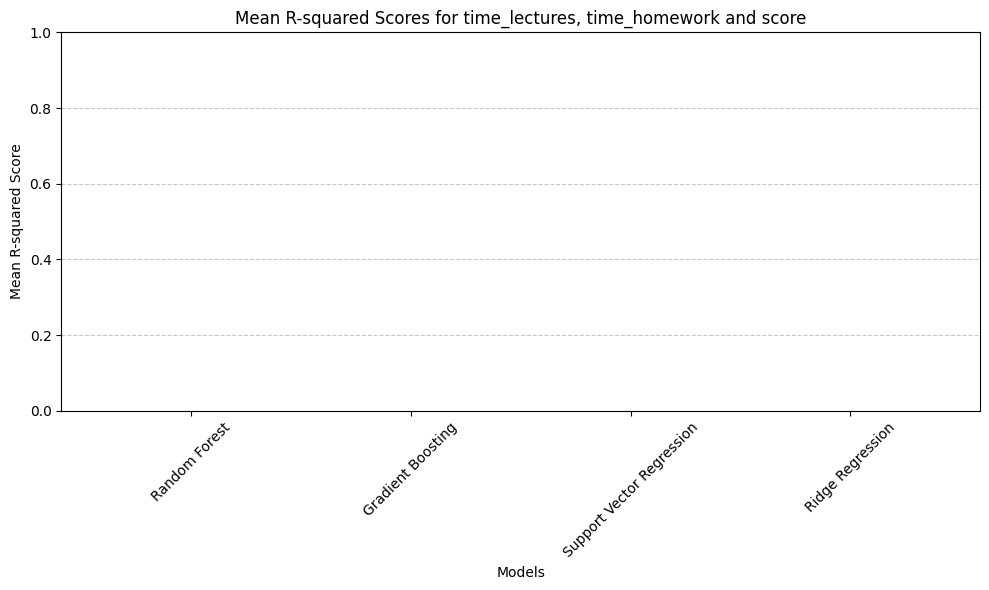

In [30]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
import numpy as np


# Function to preprocess data, train, and evaluate the model
def train_and_evaluate(module_id, feature_1, feature_2, target):
    # Filter the data for the given module_id.
    module_df = new_df[new_df['module_id'] == module_id]

    # Select the desired features and target columns.
    X = module_df[[feature_1, feature_2]]
    y = module_df[target]

    # Split the data into training and test sets.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    # Pipeline with StandardScaler and Regression Model
    model_pipeline_rf = make_pipeline(StandardScaler(), RandomForestRegressor())
    model_pipeline_gb = make_pipeline(StandardScaler(), GradientBoostingRegressor())
    model_pipeline_svr = make_pipeline(StandardScaler(), SVR())
    model_pipeline_ridge = make_pipeline(StandardScaler(), Ridge())

    # List of models
    models = {'Random Forest': model_pipeline_rf, 'Gradient Boosting': model_pipeline_gb,
              'Support Vector Regression': model_pipeline_svr, 'Ridge Regression': model_pipeline_ridge}

    # Lists to store model names and their corresponding scores
    model_names = []
    mean_scores = []

    # Evaluate each model using cross-validation
    for model_name, model in models.items():
        cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
        mean_cv_score = np.mean(cv_scores)
        model_names.append(model_name)
        mean_scores.append(mean_cv_score)
        print(f'R-squared score for {model_name} with features {feature_1}, {feature_2} and label: {target}: {mean_cv_score:.2f}')

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.bar(model_names, mean_scores, color=['blue', 'green', 'orange', 'red'])
    plt.xlabel('Models')
    plt.ylabel('Mean R-squared Score')
    plt.title(f'Mean R-squared Scores for {feature_1}, {feature_2} and {target}')
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Train and evaluate the model for each module_id and combination of features.
for module_id in new_df['module_id'].unique():
    for feature_1 in ['score', 'time_homework', 'time_lectures']:
        for feature_2 in ['score', 'time_homework', 'time_lectures']:
            if feature_1 != feature_2:
                for target in ['score', 'time_homework', 'time_lectures']:
                    if target != feature_1 and target != feature_2:
                        train_and_evaluate(module_id, feature_1, feature_2, target)


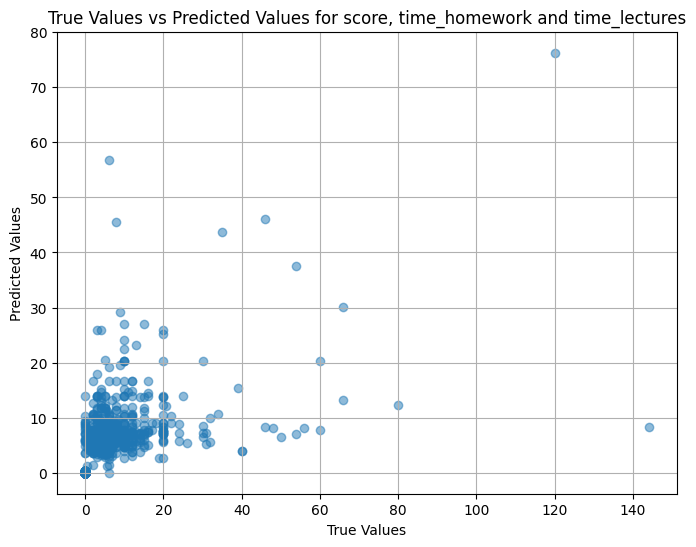

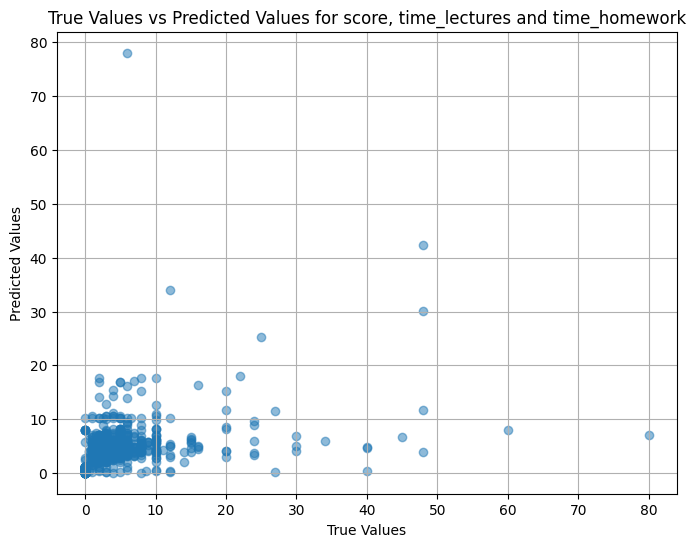

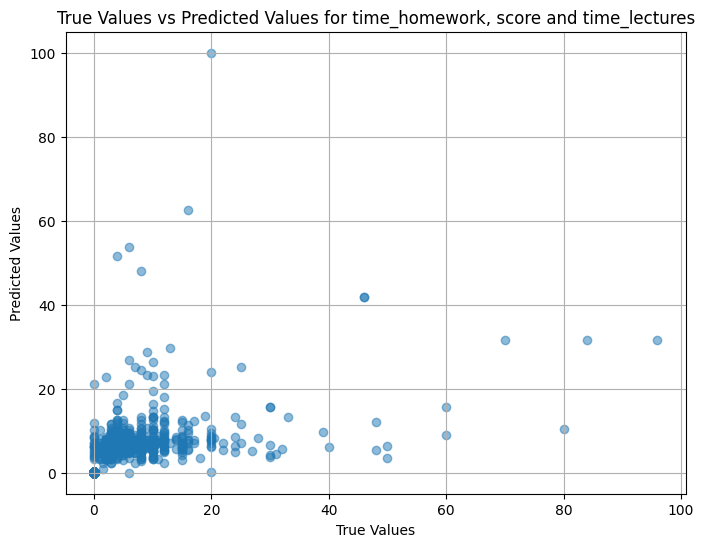

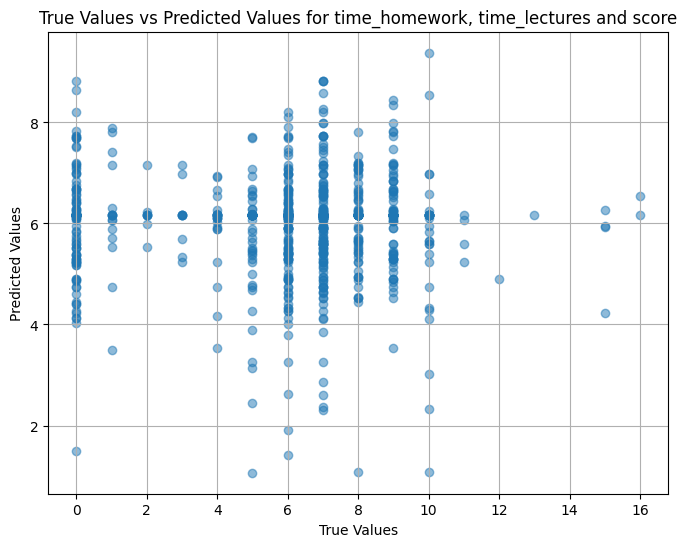

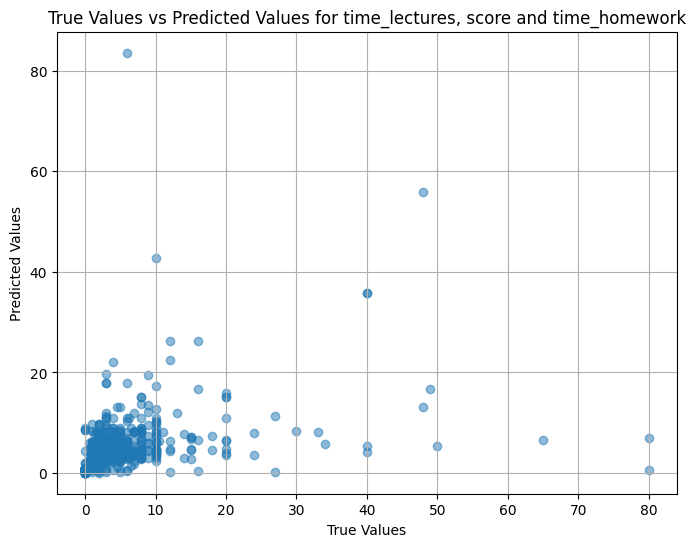

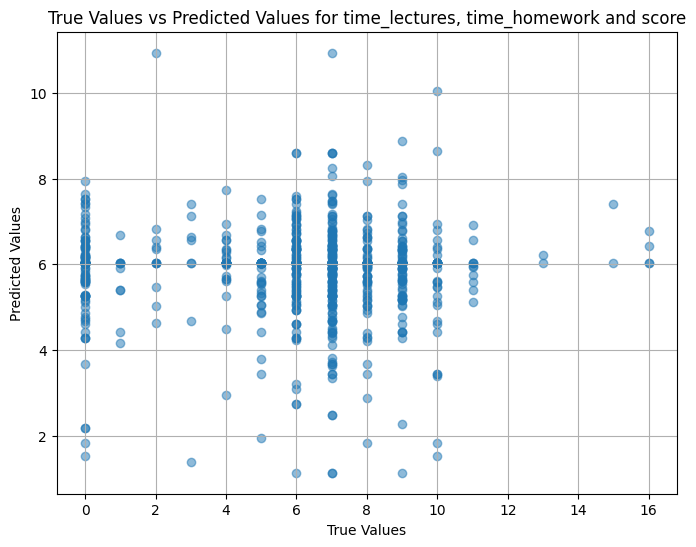

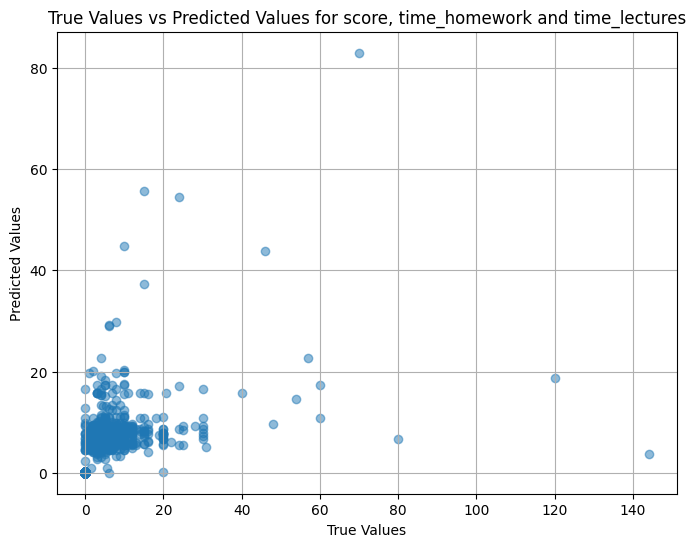

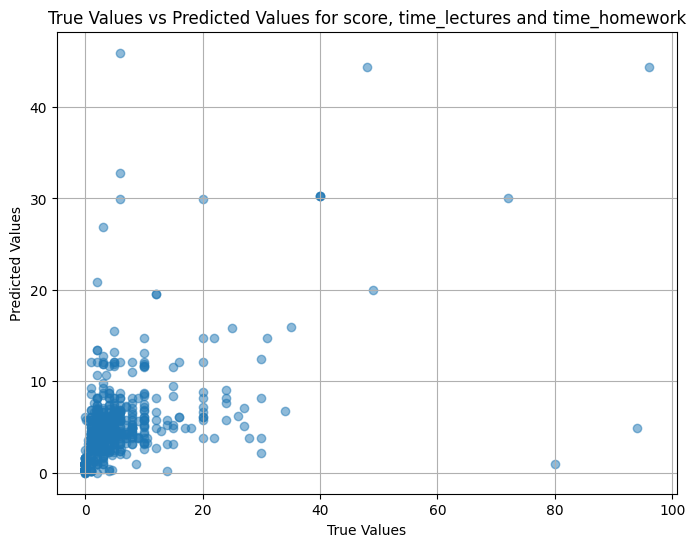

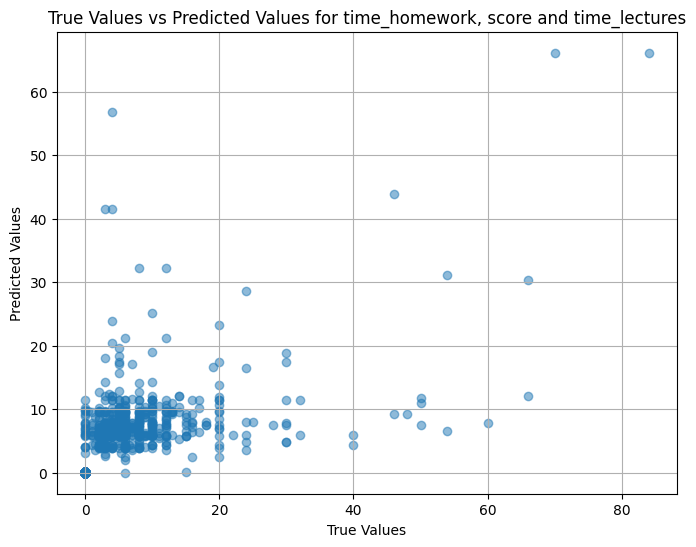

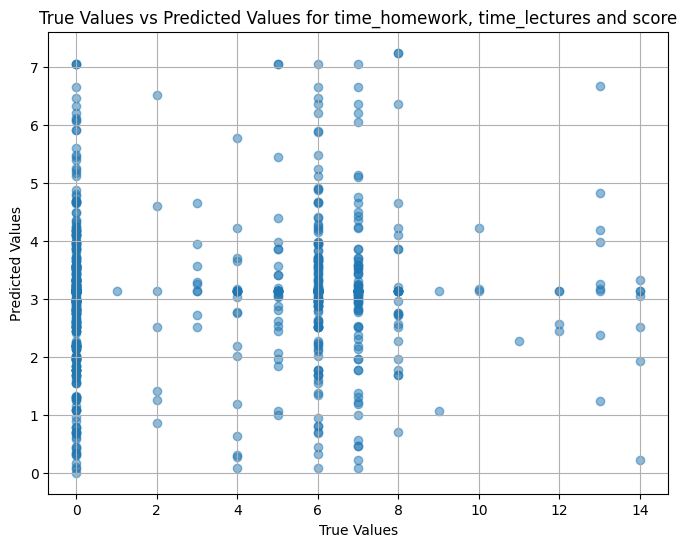

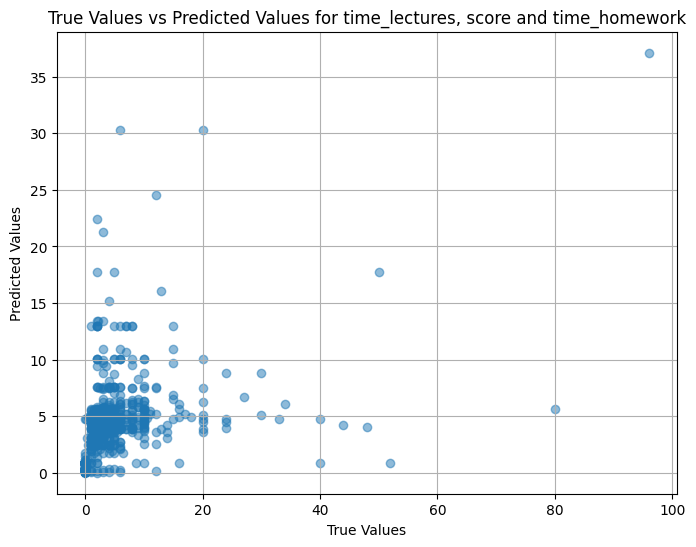

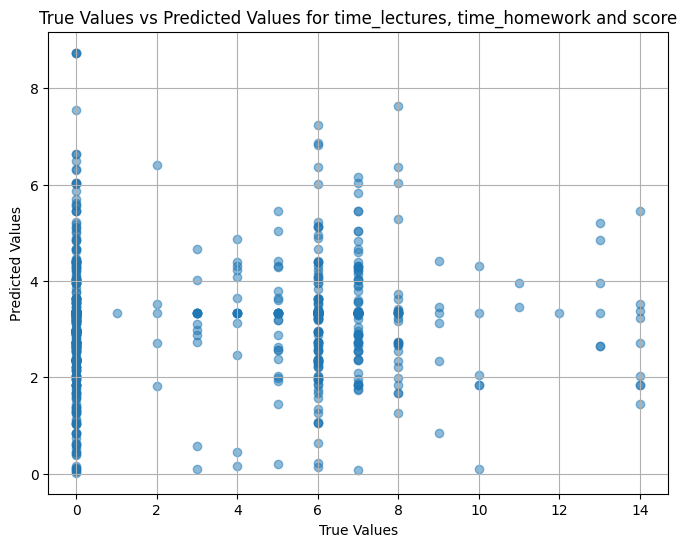

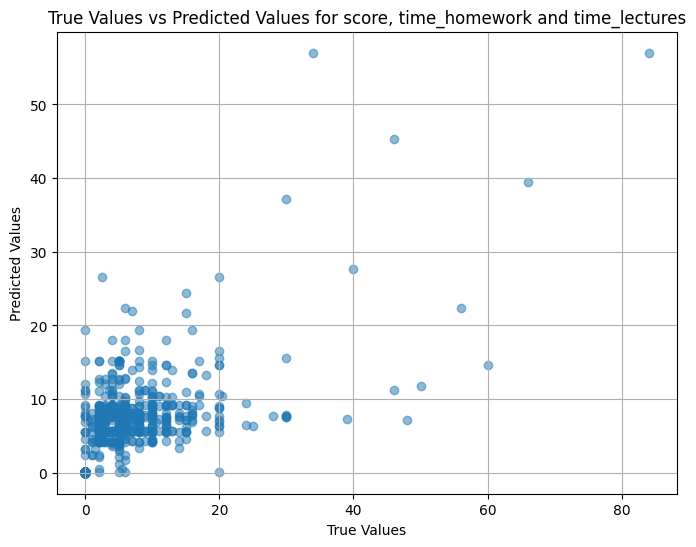

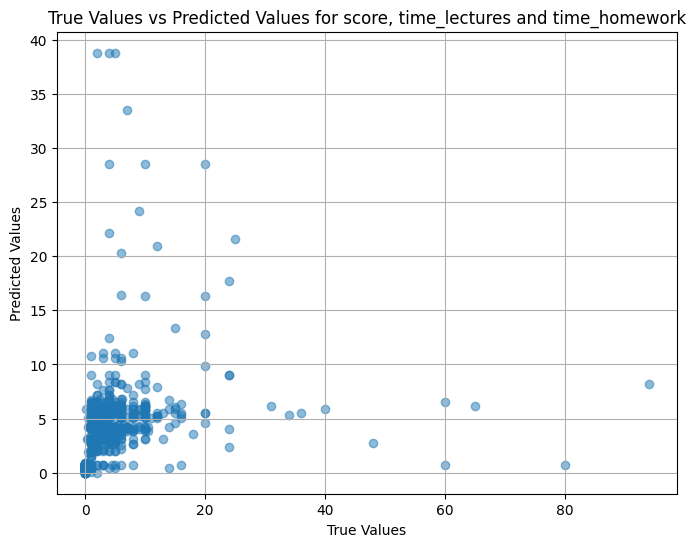

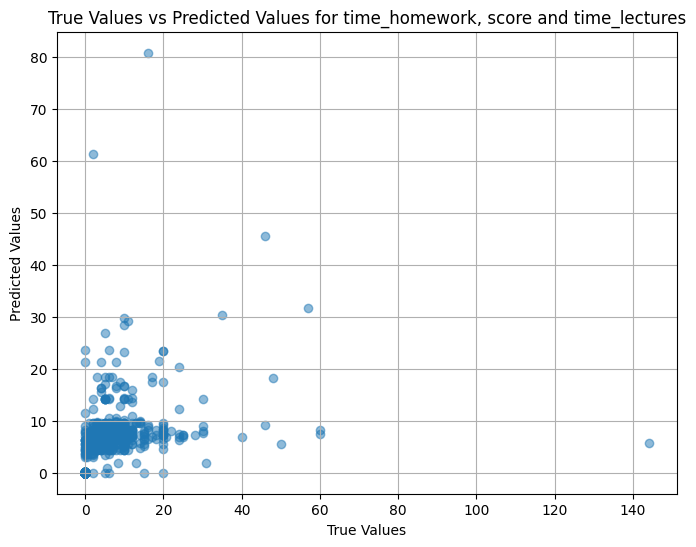

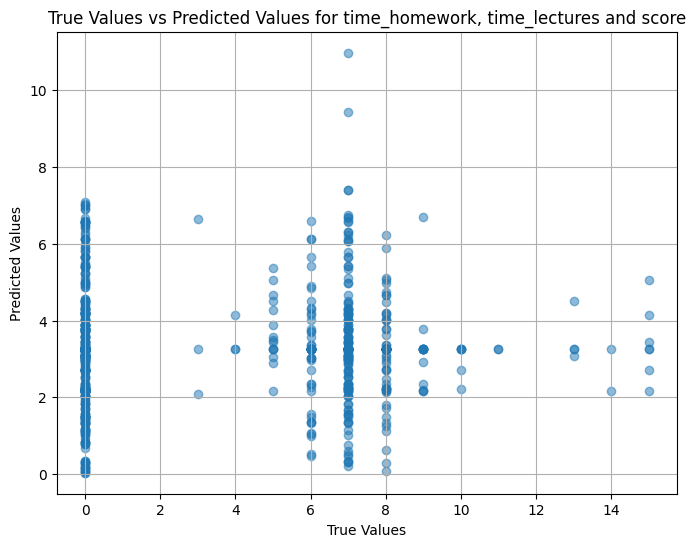

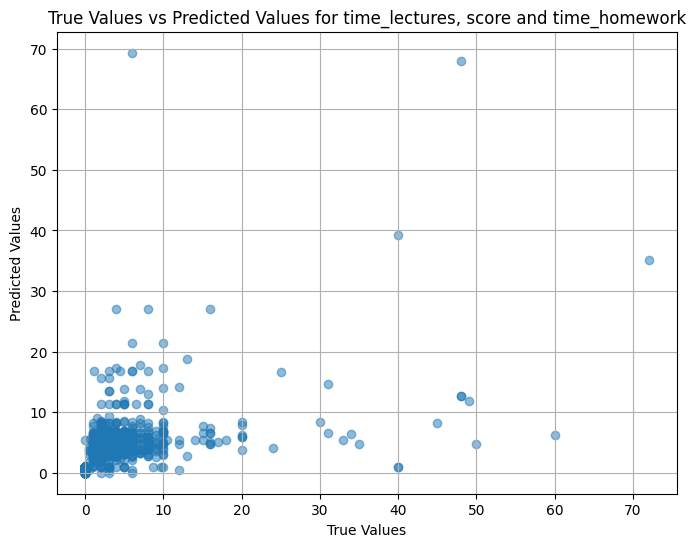

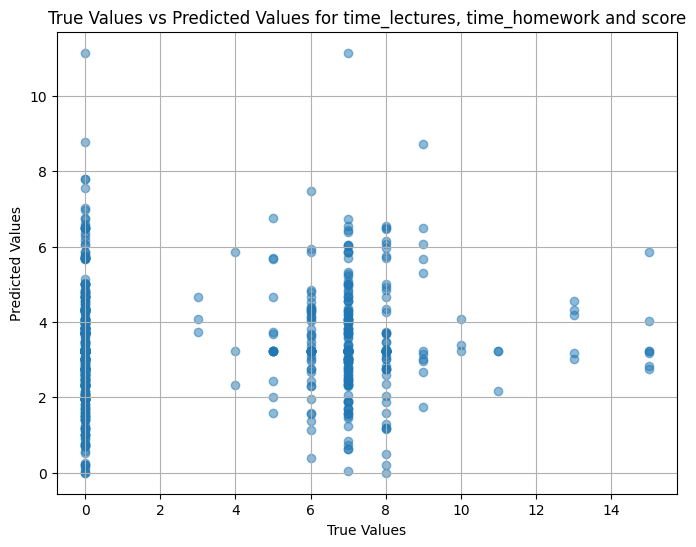

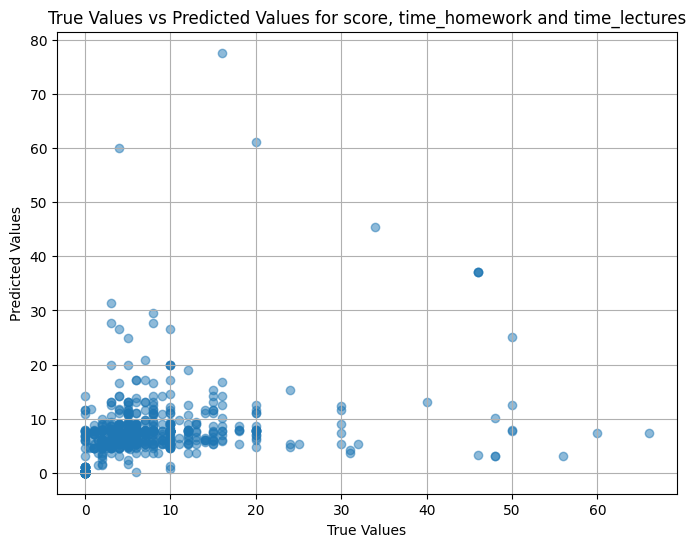

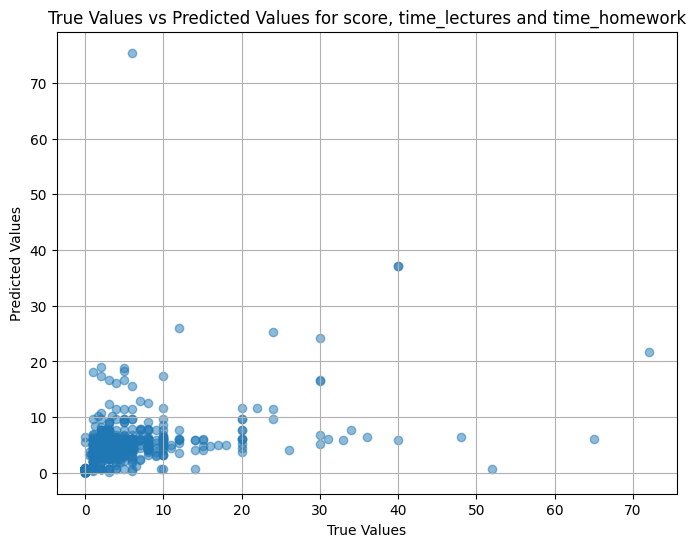

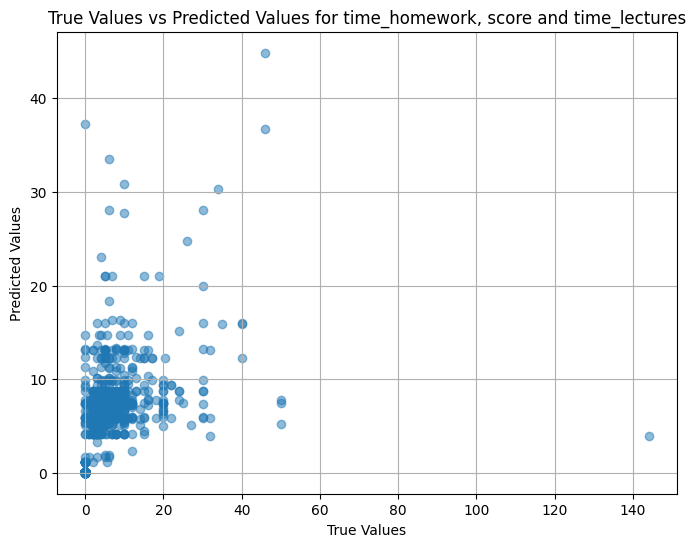

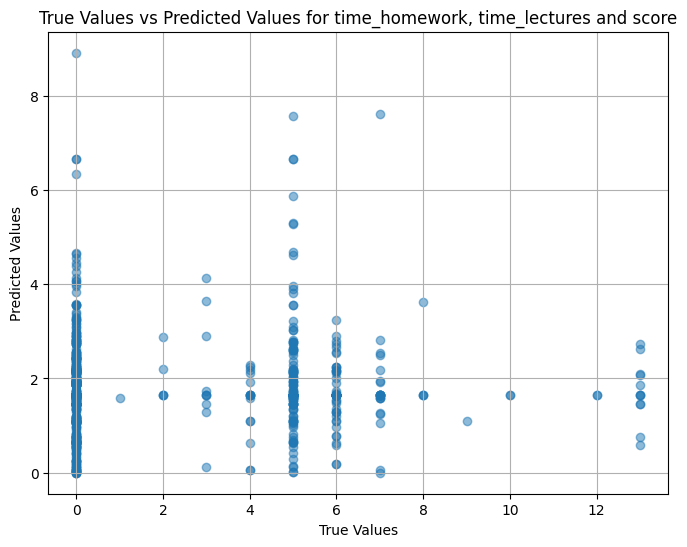

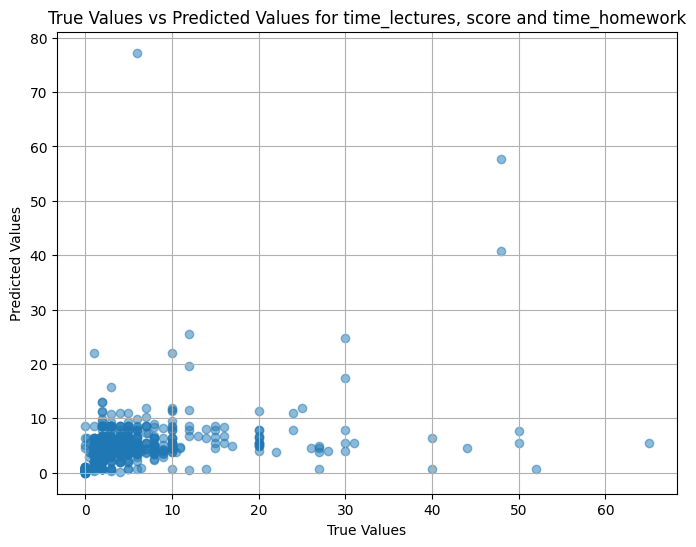

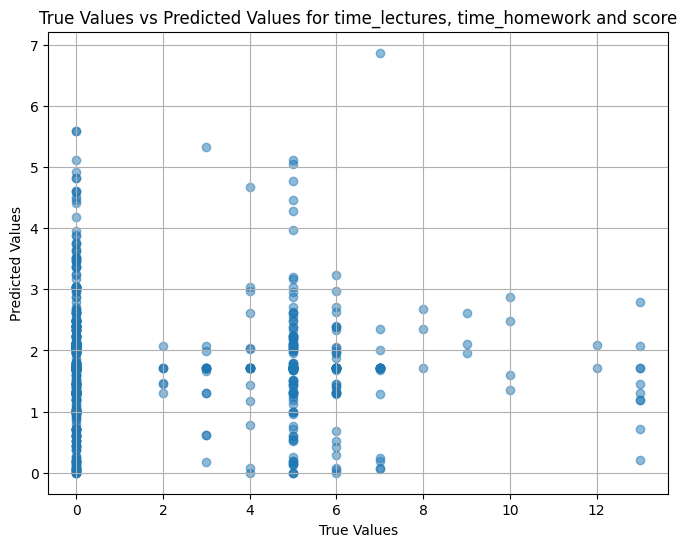

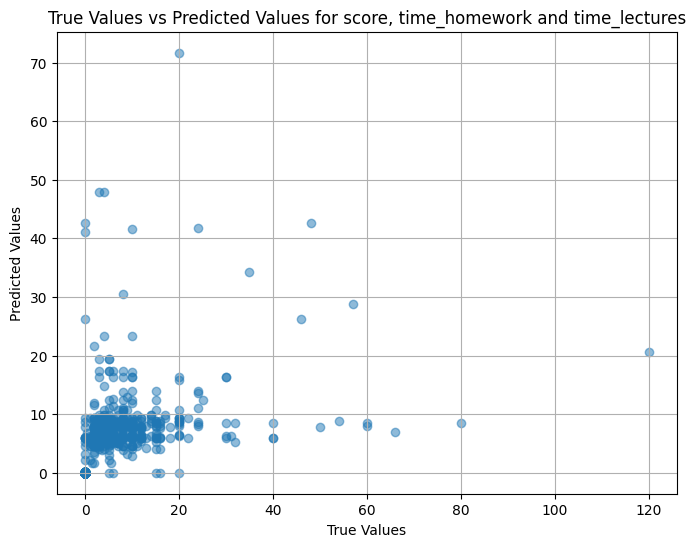

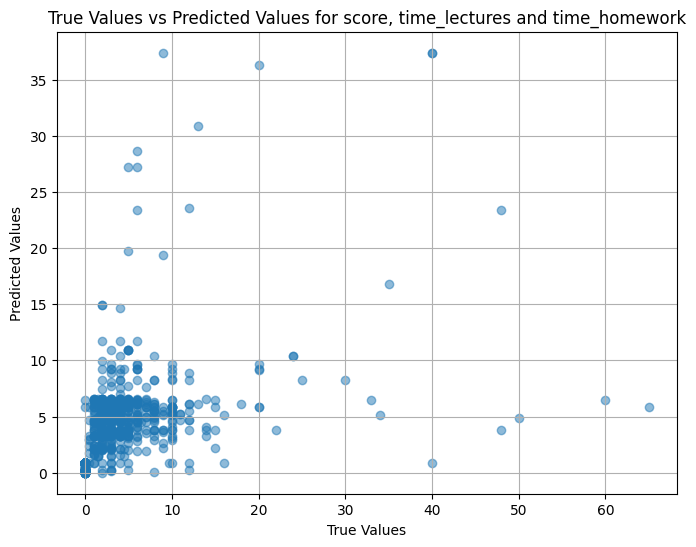

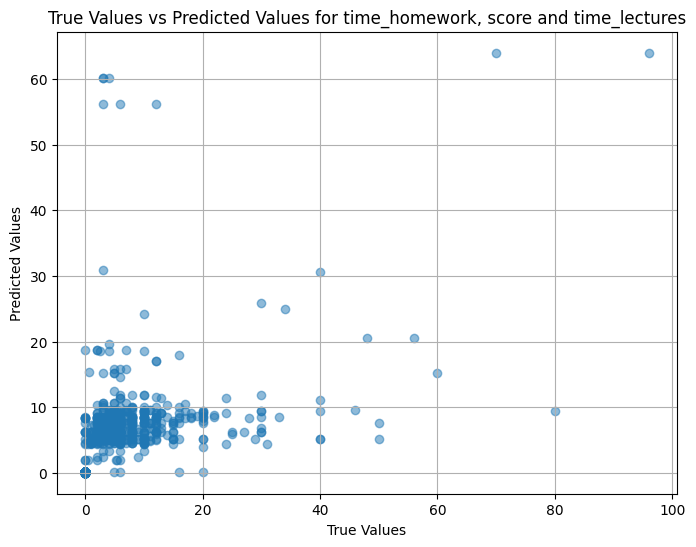

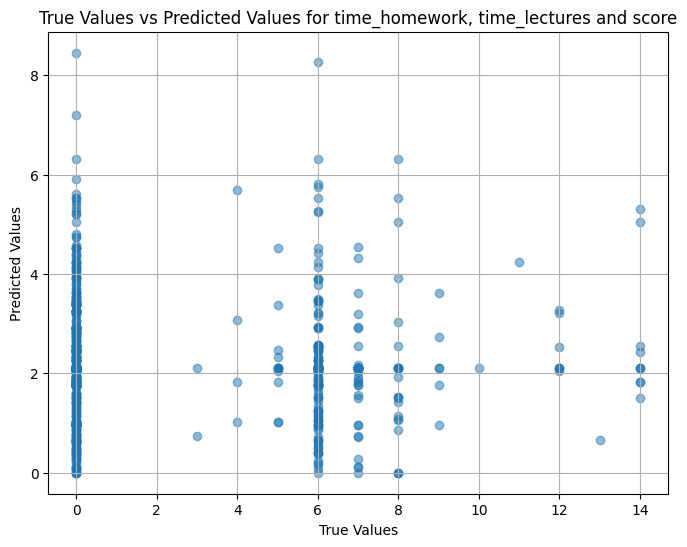

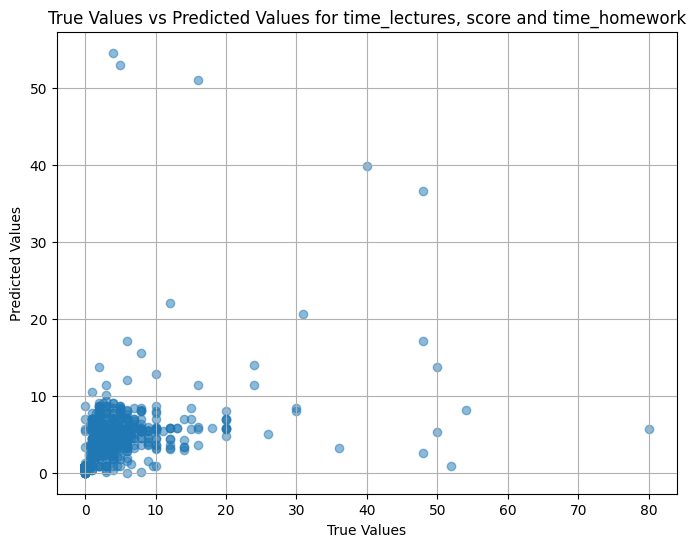

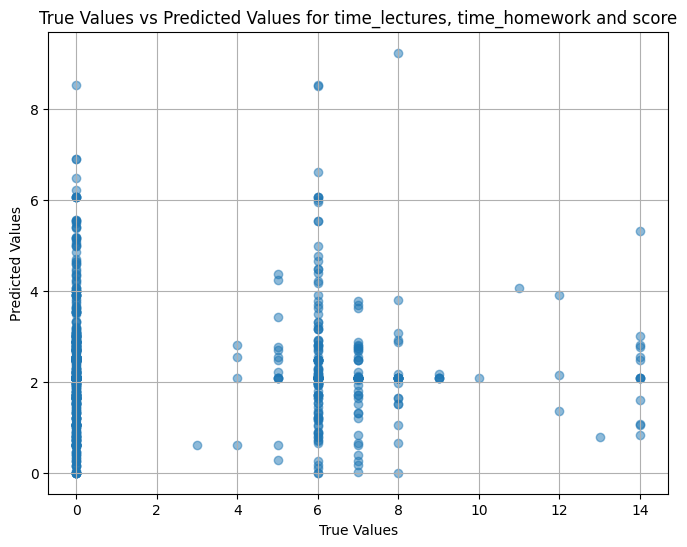

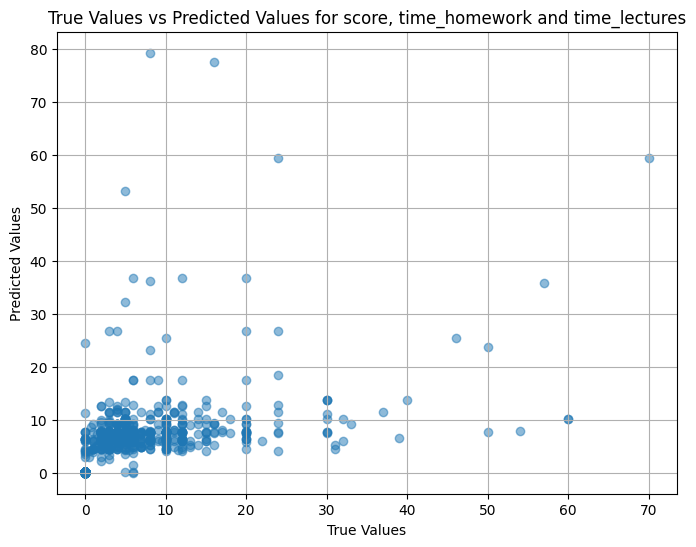

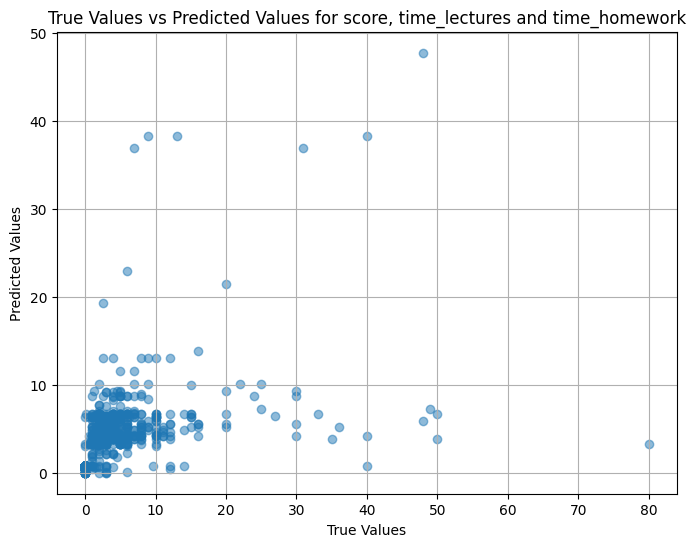

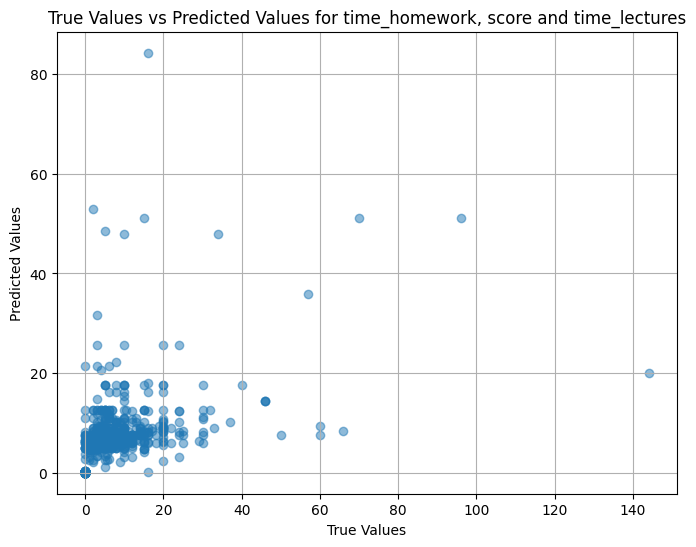

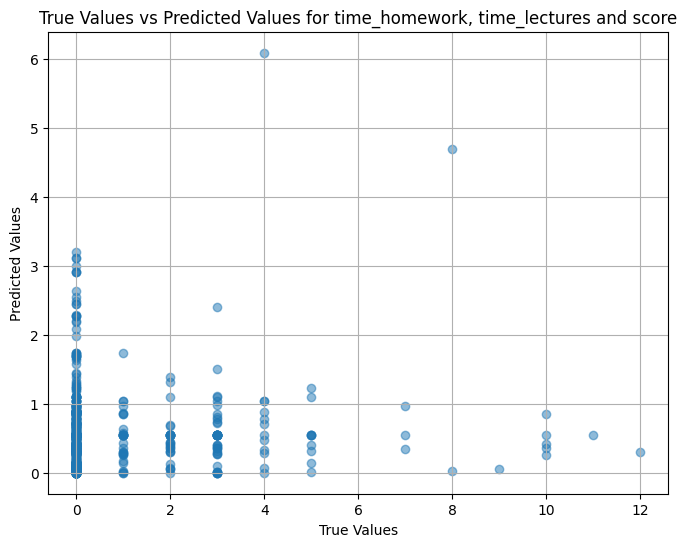

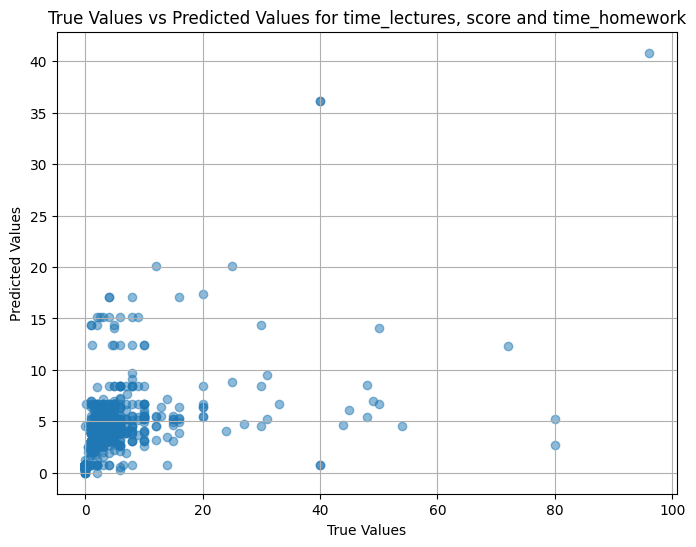

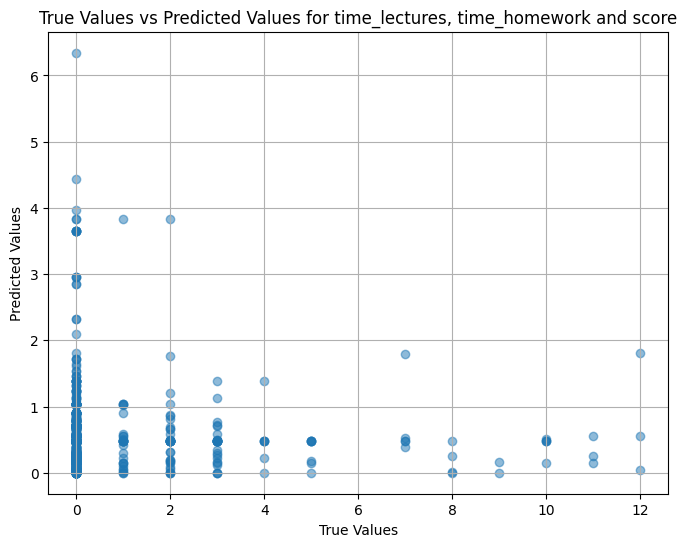

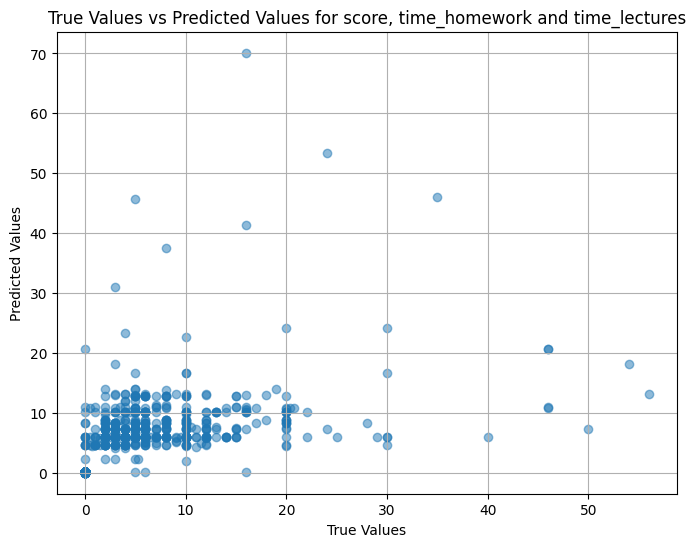

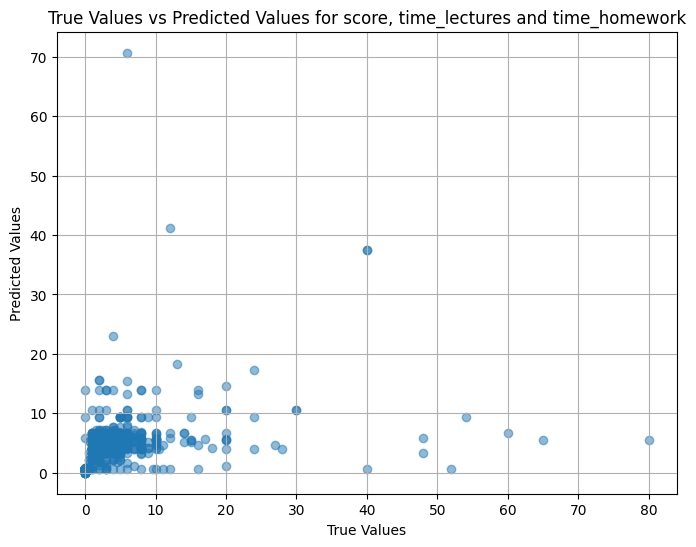

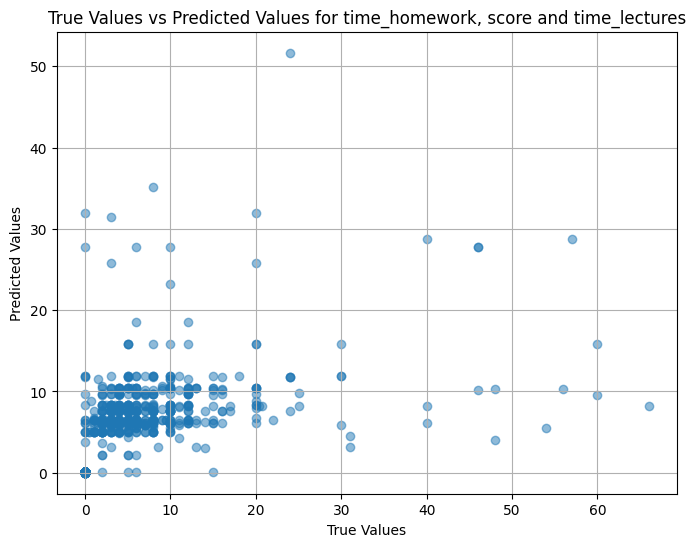

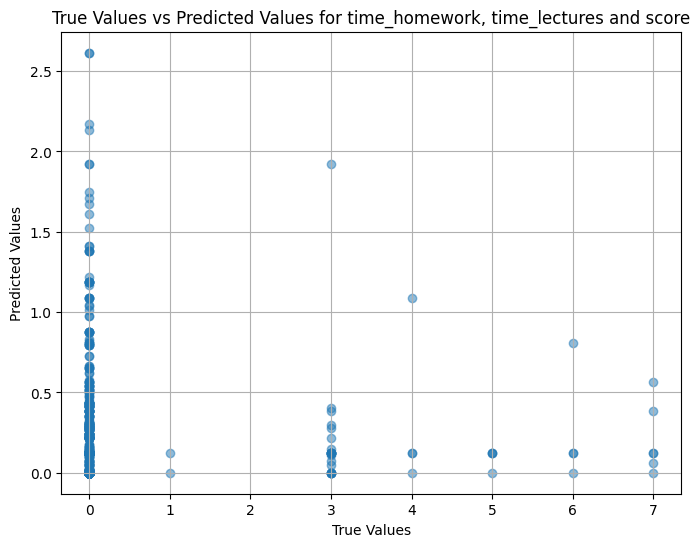

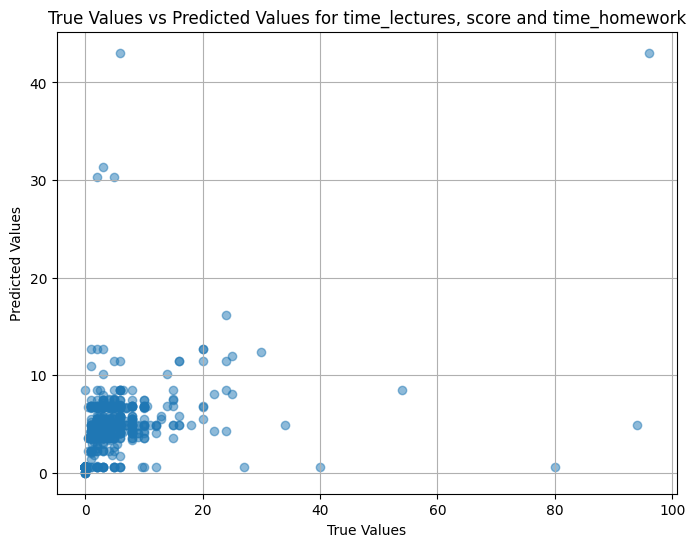

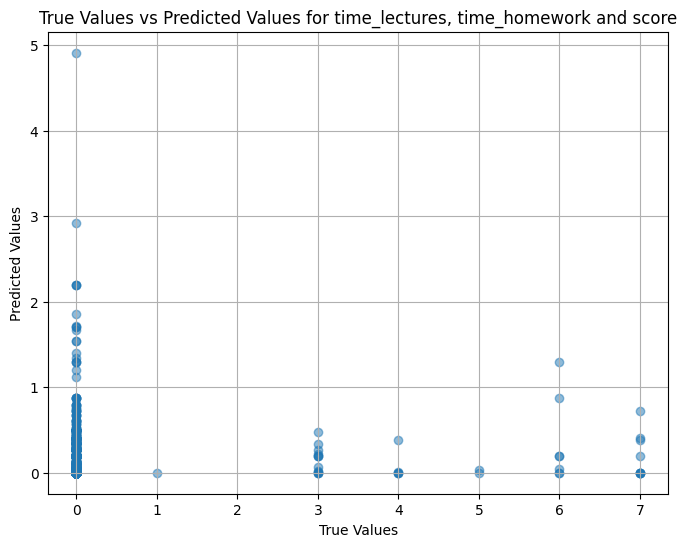

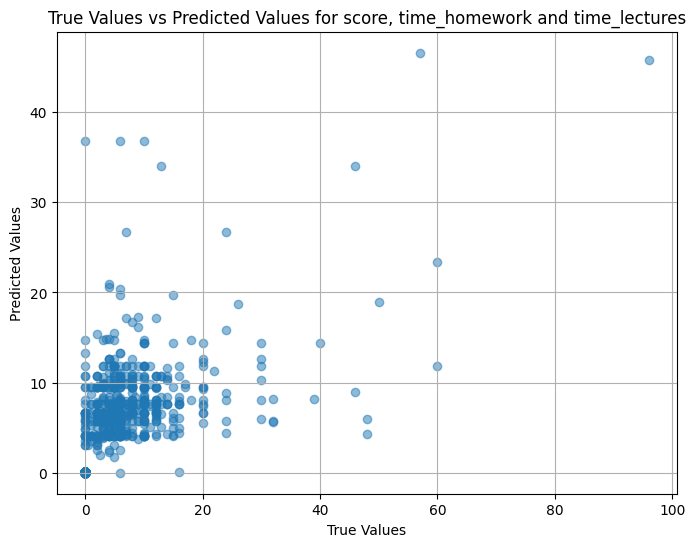

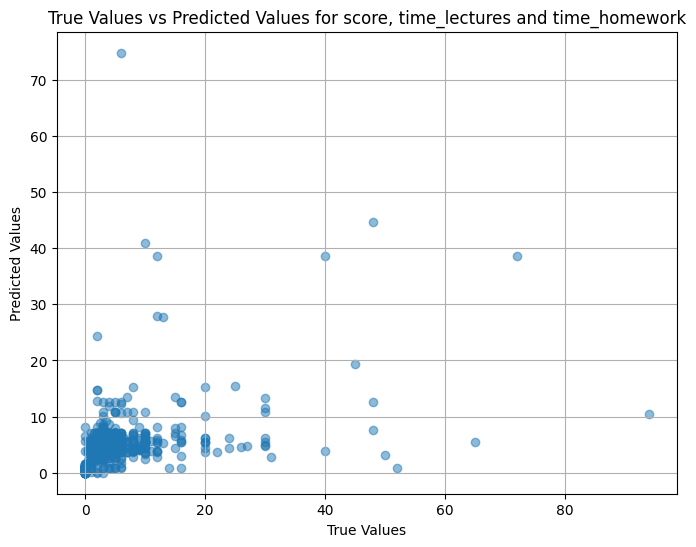

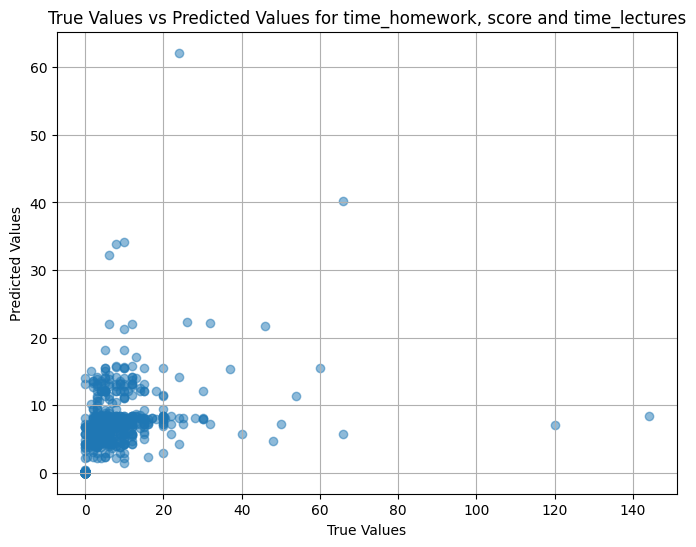

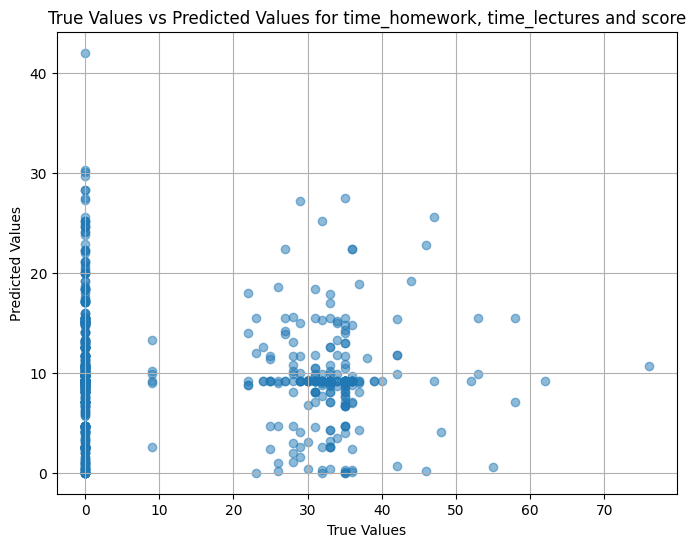

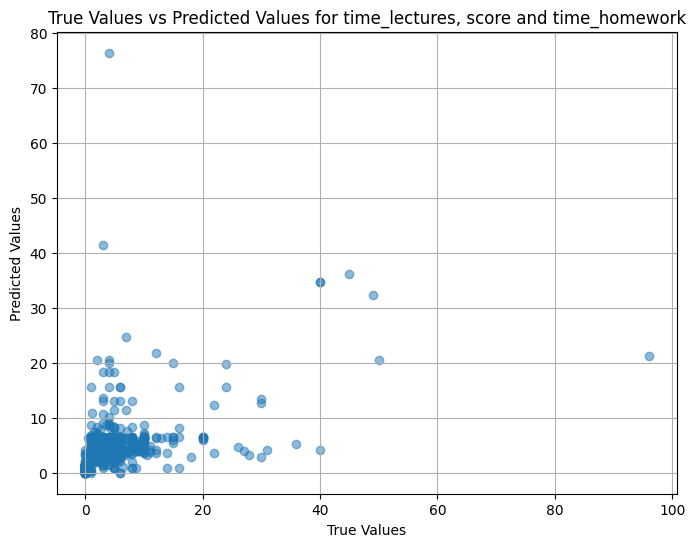

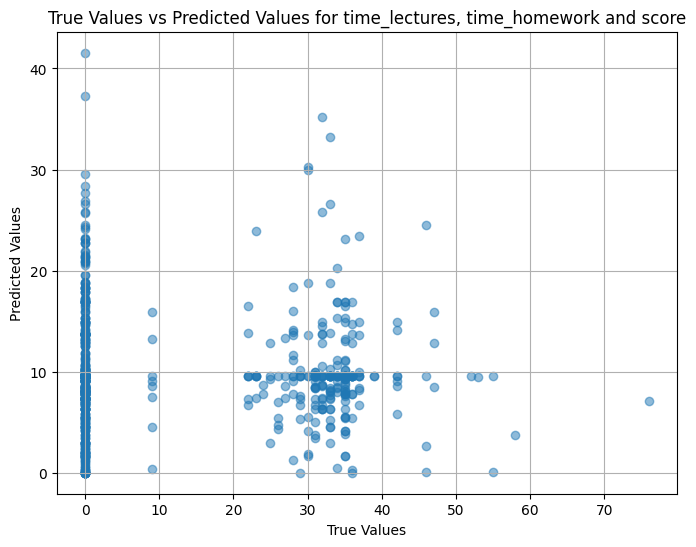

In [31]:
# prompt: for the above predicted models plot graph to show me that how many values are correct in the regression model

# Function to plot the actual vs predicted values for a given module_id and features.
def plot_actual_vs_predicted(module_id, feature_1, feature_2, target):
    # Filter the data for the given module_id.
    module_df = new_df[new_df['module_id'] == module_id]

    # Select the desired features and target columns.
    X = module_df[[feature_1, feature_2]]
    y = module_df[target]

    # Split the data into training and test sets.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    # Train the model.
    model = RandomForestRegressor()
    model.fit(X_train, y_train)

    # Make predictions on the test set.
    y_pred = model.predict(X_test)

    # Plot the actual vs predicted values.
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Actual vs Predicted Values for {feature_1}, {feature_2} and {target}')
    plt.grid(True)
    plt.show()

# Plot the actual vs predicted values for each module_id and combination of features.
for module_id in new_df['module_id'].unique():
    for feature_1 in ['score', 'time_homework', 'time_lectures']:
        for feature_2 in ['score', 'time_homework', 'time_lectures']:
            if feature_1 != feature_2:
                for target in ['score', 'time_homework', 'time_lectures']:
                    if target != feature_1 and target != feature_2:
                        plot_actual_vs_predicted(module_id, feature_1, feature_2, target)
